In [1]:
# base environment
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import pyro
import pyro.distributions as dist
from pyro.nn import PyroModule, PyroSample
import torch.nn as nn
import torch.nn.functional as F
from pyro.infer.autoguide import AutoDiagonalNormal
from pyro.infer import SVI, Trace_ELBO, Predictive
from tqdm.auto import trange, tqdm

from xgboost.sklearn import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score,roc_auc_score,f1_score



In [ ]:
# set linewidth of the frame
,fontweight="bold"

for spine in ax.spines.values():
    spine.set_linewidth(2.5)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.annotate('(a)', xy=(1, 1), xytext=(0, 1),xycoords="figure fraction",fontsize=20)

plt.savefig(r"D:\HKUST\Program\结肠癌分类器\终稿\论文图片精修\图片修改v2\Fig0.png",dpi=800,bbox_inches='tight',pad_inches=0.2)

In [2]:
#df = pd.read_excel(r"D:\HKUST\Program\结肠癌分类器\终稿\Ver 10.24\combined_data_simplified.xlsx",index_col=0)
df = pd.read_excel(r"D:\HKUST\Program\结肠癌分类器\终稿\Ver 10.24\combined_data_English.xlsx")
#df.drop(["Unnamed: 0.1","Unnamed: 0.1.1",'Unnamed: 0.1.1.1','癌前病变', '良性疾病', '健康或非结肠疾病'],axis=1,inplace=True)
df.drop(["PATIENT_ID"],axis=1,inplace=True)
df=df.head(27911)
df

,Age,WBC,Lym,Mon,Leu,Eos,Baso,Lym%,Mon%,Eos%,...,Fecal color positive,Fecal color's data is missing',CEA,FIT positive,FIT's data is missing',Fecal transferrin positive,Fecal transferrin's data is missing',Gender,BMI,癌
0,61,4.16,1.09,0.52,2.53,0.00,0.02,26.2,12.5,0.0,...,0,1,8.699406,0,1,0,1,1.00000,22.222222,0
1,73,3.63,0.75,0.17,2.67,0.04,0.00,20.7,4.7,1.1,...,0,1,8.699406,0,1,0,1,1.00000,25.826446,0
2,84,3.65,1.33,0.22,1.98,0.10,0.02,36.4,6.0,2.7,...,0,1,1.690000,0,1,0,1,0.00000,19.531250,0
3,71,7.29,1.79,0.30,5.08,0.12,0.00,24.6,4.1,1.6,...,0,1,8.699406,0,1,0,1,0.63176,23.857203,0
4,80,5.68,1.81,0.37,3.36,0.12,0.02,31.9,6.5,2.1,...,0,0,3.630000,0,1,0,1,0.00000,29.968783,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27906,56,5.51,1.82,0.45,3.04,0.17,0.03,33.0,8.2,3.1,...,0,0,8.699406,0,1,0,1,1.00000,28.081633,0
27907,76,5.71,1.81,0.35,3.48,0.03,0.04,31.7,6.1,0.5,...,0,1,8.699406,0,1,0,1,0.00000,26.175195,0
27908,65,5.99,1.79,0.73,2.92,0.48,0.07,29.9,12.2,8.0,...,0,0,1.280000,0,1,0,1,1.00000,18.591130,0
27909,52,6.72,2.11,0.49,3.86,0.21,0.05,31.4,7.3,3.1,...,0,0,0.750000,0,0,0,0,0.00000,24.243918,0


In [3]:
#df.to_excel(r"D:\HKUST\Program\结肠癌分类器\终稿\去粪指标修改\Eng_rawdata.xlsx")
df= pd.read_excel(r"D:\HKUST\Program\结肠癌分类器\终稿\去粪指标修改\Eng_rawdata.xlsx")
df

,Age,WBC,Lym,Mon,Ne,Eos,Baso,Lym%,Mon%,Eos%,...,Fecal color positive,Fecal color's data is missing',CEA,FIT positive,FIT's data is missing',Fecal transferrin positive,Fecal transferrin's data is missing',Gender,BMI,癌
0,61,4.16,1.09,0.52,2.53,0.00,0.02,26.2,12.5,0.0,...,0,1,8.699406,0,1,0,1,1.00000,22.222222,0
1,73,3.63,0.75,0.17,2.67,0.04,0.00,20.7,4.7,1.1,...,0,1,8.699406,0,1,0,1,1.00000,25.826446,0
2,84,3.65,1.33,0.22,1.98,0.10,0.02,36.4,6.0,2.7,...,0,1,1.690000,0,1,0,1,0.00000,19.531250,0
3,71,7.29,1.79,0.30,5.08,0.12,0.00,24.6,4.1,1.6,...,0,1,8.699406,0,1,0,1,0.63176,23.857203,0
4,80,5.68,1.81,0.37,3.36,0.12,0.02,31.9,6.5,2.1,...,0,0,3.630000,0,1,0,1,0.00000,29.968783,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27906,56,5.51,1.82,0.45,3.04,0.17,0.03,33.0,8.2,3.1,...,0,0,8.699406,0,1,0,1,1.00000,28.081633,0
27907,76,5.71,1.81,0.35,3.48,0.03,0.04,31.7,6.1,0.5,...,0,1,8.699406,0,1,0,1,0.00000,26.175195,0
27908,65,5.99,1.79,0.73,2.92,0.48,0.07,29.9,12.2,8.0,...,0,0,1.280000,0,1,0,1,1.00000,18.591130,0
27909,52,6.72,2.11,0.49,3.86,0.21,0.05,31.4,7.3,3.1,...,0,0,0.750000,0,0,0,0,0.00000,24.243918,0


In [6]:
useful_item=['RDW',
 "Fecal transferrin's data is missing'",
 'FIT positive',
 'P-LCR',
 'Prealbumin',
 'Age',
 "FIT's data is missing'",
 'K+',
 'Gender',
 'TBA',
 'TP',
 'Leu%',
 'Fecal transferrin positive',
 'A/G\xa0',
 'ALB',
 'Na+',
 'WBC',
 'PLT',
 'Baso%',
 'Urea',
 'Eos%']

### Featrue corr and corr with CRCs


C:\Users\Wu Zihao\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8322 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Wu Zihao\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 160 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Wu Zihao\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8322 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Wu Zihao\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 160 missing from current font.
  font.set_text(s, 0, flags=flags)


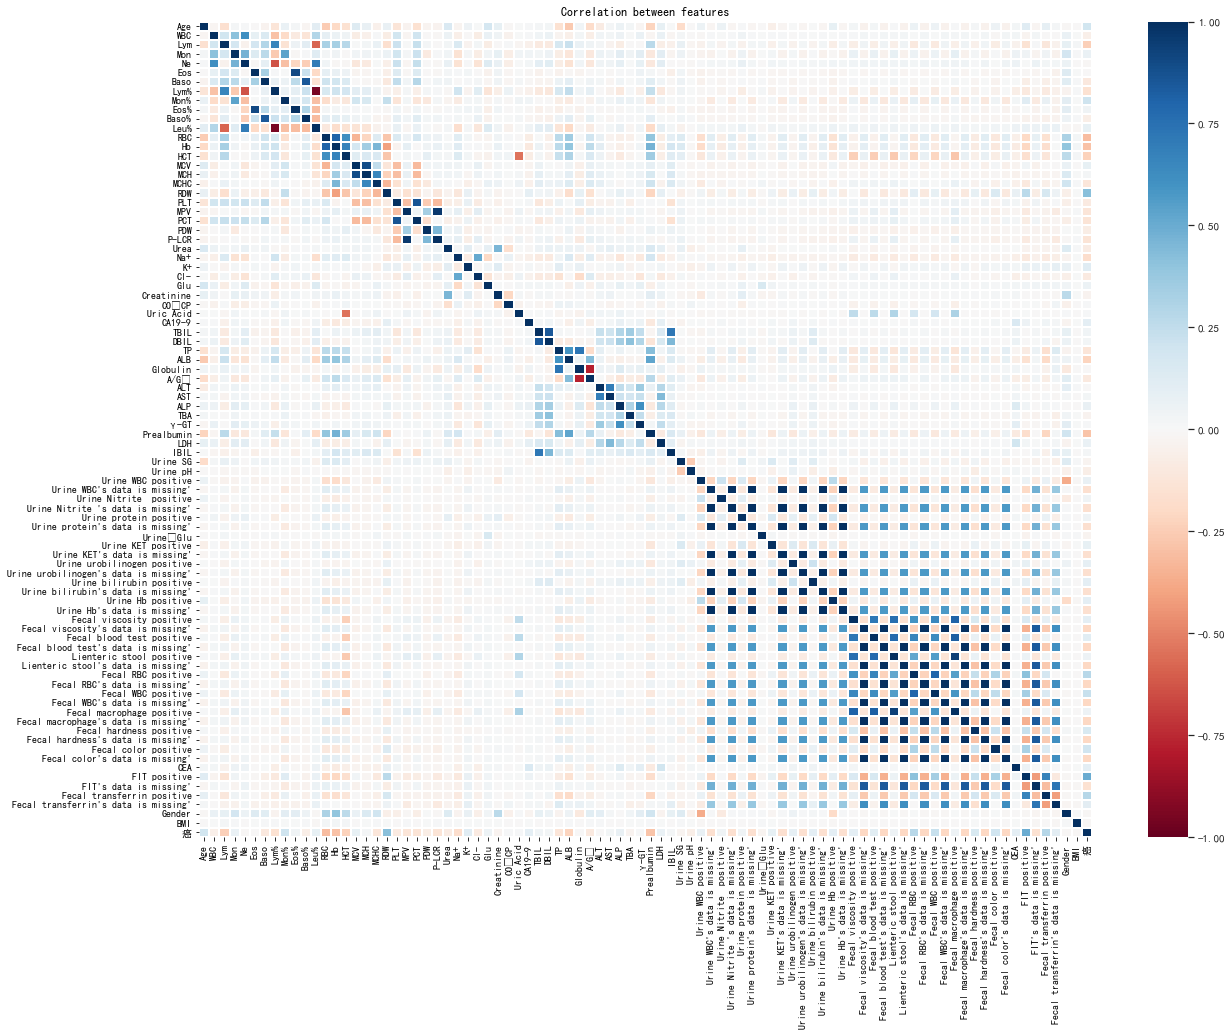

In [7]:
corr = df.corr()
# print(corr)
f, ax= plt.subplots(figsize = (20, 15))
rc = {'font.sans-serif': 'SimHei','axes.unicode_minus': False}
sns.set(context='notebook', style='ticks', rc=rc)
sns.heatmap(corr,cmap='RdBu', linewidths = 0.1,xticklabels=True, yticklabels=True, ax = ax, vmin=-1,vmax=1)
# 设置Axes的标题
ax.set_title('Correlation between features')
plt.show()

C:\Users\Wu Zihao\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


Text(0.5, 1.0, 'correlation with CRC with top important features')

C:\Users\Wu Zihao\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 160 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Wu Zihao\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 160 missing from current font.
  font.set_text(s, 0, flags=flags)


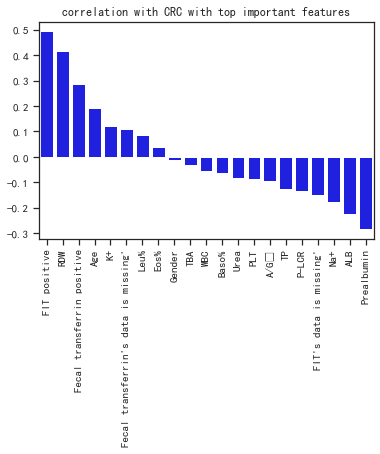

In [8]:
result=pd.DataFrame(corr["癌"]).T
result.sort_values(axis=1,by="癌",ascending=False,inplace=True)
abs_result=abs(result)
abs_result.sort_values(axis=1,by="癌",ascending=False,inplace=True)

important_features=list(abs_result.columns)[1:21]
abs_result=result[useful_item]
abs_result.sort_values(axis=1,by="癌",ascending=False,inplace=True)
abs_result

#sns.barplot(data=result)
sns.barplot(data=abs_result,color="blue");
plt.xticks(rotation=90);
plt.title("correlation with CRC with top important features")

In [6]:
#abs_result.to_excel(r"D:\HKUST\Program\结肠癌分类器\终稿\Ver 10.24\box graph\All data\corr_ranking.xlsx")

In [93]:
df=pd.read_excel(r"D:\HKUST\Program\结肠癌分类器\终稿\10.31整理\Fig 16s\confident\confident_data.xlsx")
df

,Age,WBC,Lym,Mon,Leu,Eos,Baso,Lym%,Mon%,Eos%,...,Fecal color positive,Fecal color's data is missing',CEA,FIT positive,FIT's data is missing',Fecal transferrin positive,Fecal transferrin's data is missing',Gender,BMI,癌
0,37,9.94,2.21,0.55,7.12,0.03,0.03,22.2,5.5,0.3,...,0,1,8.699406,0,1,0,1,0.00000,26.672763,0
1,70,5.07,1.80,0.49,2.52,0.23,0.03,35.4,9.7,4.6,...,0,0,5.940000,1,0,0,1,0.00000,23.875433,1
2,58,3.79,0.77,0.18,2.81,0.02,0.01,20.3,4.7,0.5,...,0,1,5.690000,0,1,0,1,0.00000,22.892820,0
3,66,4.43,1.97,0.25,2.09,0.10,0.02,44.5,5.6,2.3,...,0,1,8.699406,0,1,0,1,0.00000,24.034610,0
4,53,9.72,0.66,0.36,8.61,0.07,0.02,6.8,3.7,0.7,...,0,0,36.730000,1,0,1,0,0.00000,24.835763,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3625,73,6.19,0.32,0.69,5.13,0.03,0.02,5.2,11.1,0.5,...,0,0,2.340000,0,1,0,1,1.00000,17.538265,1
3626,36,6.51,1.94,0.33,4.03,0.18,0.03,29.7,5.1,2.9,...,0,1,1.670000,0,1,0,1,0.63176,23.857203,0
3627,77,6.52,2.07,0.40,3.71,0.30,0.04,31.7,6.1,4.6,...,0,0,8.699406,0,1,0,1,0.00000,25.289419,0
3628,31,7.06,1.78,0.33,4.84,0.08,0.03,25.2,4.7,1.1,...,0,1,8.699406,0,1,0,1,0.63176,23.857203,0


### Features in CRC and non-CRC groups

In [24]:
### to non-binary varibles
grouped_feature=[];
name=[];
for i in df.columns:
    if i != "PATIENT_ID" and i != "癌":
        mean = "%.2f" %df[i].mean()
        std = "%.2f" %df[i].std()
        CRC_mean = "%.2f" %df[i][df["癌"]==1].mean()
        CRC_std = "%.2f" %df[i][df["癌"]==1].std()
        nonCRC_mean = "%.2f" %df[i][df["癌"]==0].mean()
        nonCRC_std = "%.2f" %df[i][df["癌"]==0].std()
        name.append(i)
        
        grouped_feature.append([mean,std,CRC_mean,CRC_std,nonCRC_mean,nonCRC_std])

In [25]:
### to binary varibles
grouped_feature=[];
name=[];
for i in df.columns:
    if i in binary_list:
        CRC_pos_number =  df[i][df["癌"]==1].sum()
        CRC_total_number = df[i][df["癌"]==1].count()
        CRC_pos_rate =  CRC_pos_number/CRC_total_number
        
        nonCRC_pos_number = df[i][df["癌"]==0].sum()
        nonCRC_total_number = df[i][df["癌"]==0].count()
        nonCRC_pos_rate =  nonCRC_pos_number/nonCRC_total_number

        name.append(i)
        
        grouped_feature.append(["%.0f" %CRC_pos_number,"%.0f" %CRC_total_number,"%.3f" %CRC_pos_rate,
                                "%.0f" %nonCRC_pos_number,"%.0f" %nonCRC_total_number,"%.3f" %nonCRC_pos_rate])
        
s=pd.DataFrame(grouped_feature)
s.columns = ["CRC_pos_number","CRC_total_number","CRC_pos_rate","nonCRC_pos_number","nonCRC_total_number","nonCRC_pos_rate"]
s.index = name
s

,CRC_pos_number,CRC_total_number,CRC_pos_rate,nonCRC_pos_number,nonCRC_total_number,nonCRC_pos_rate
Urine WBC positive,185,814,0.227,498,2816,0.177
Urine WBC's data is missing',51,814,0.063,594,2816,0.211
Urine Nitrite positive,17,814,0.021,43,2816,0.015
Urine Nitrite 's data is missing',51,814,0.063,593,2816,0.211
Urine protein positive,46,814,0.057,164,2816,0.058
Urine protein's data is missing',51,814,0.063,593,2816,0.211
Urine KET positive,92,814,0.113,143,2816,0.051
Urine KET's data is missing',51,814,0.063,593,2816,0.211
Urine urobilinogen positive,59,814,0.072,67,2816,0.024
Urine urobilinogen's data is missing',51,814,0.063,593,2816,0.211


In [12]:
import scipy
#s.insert(loc=6,column="statistical value",value=0)
#s.insert(loc=7,column="p value",value=0)
for i in s.index:
    CRC_pos_rate=float(s["CRC_pos_rate"].loc[i])
    nonCRC_pos_rate=float(s["nonCRC_pos_rate"].loc[i])
    statistical_value = (CRC_pos_rate-nonCRC_pos_rate)**2/CRC_pos_rate*float(s["CRC_total_number"].loc[i])+(CRC_pos_rate-nonCRC_pos_rate)**2/(1-CRC_pos_rate)*float(s["CRC_total_number"].loc[i])
    P_value = (1-scipy.stats.chi2.cdf(x=statistical_value,df=1))
    s["statistical value"].loc[i]=statistical_value
    s["p value"].loc[i]="%.3f" %P_value
s

KeyError: 'statistical value'

In [26]:
s=pd.DataFrame(grouped_feature)
s.columns = ["mean","std","CRC_mean","CRC_std","nonCRC_mean","nonCRC_std"]
s.index = name
s.insert(loc=2,column="str_all",value=0)
s.insert(loc=5,column="str_CRC",value=0)
s.insert(loc=8,column="str_nonCRC",value=0)

for i in s.index:
    s["str_all"].loc[i] = str(s["mean"].loc[i])+"±"+str(s["std"].loc[i])
    s["str_CRC"].loc[i] = str(s["CRC_mean"].loc[i])+"±"+str(s["CRC_std"].loc[i])
    s["str_nonCRC"].loc[i] = str(s["nonCRC_mean"].loc[i])+"±"+str(s["nonCRC_std"].loc[i])
s

C:\Users\Wu Zihao\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,mean,std,str_all,CRC_mean,CRC_std,str_CRC,nonCRC_mean,nonCRC_std,str_nonCRC
Urine WBC positive,185,814,185±814,0.227,498,0.227±498,2816,0.177,2816±0.177
Urine WBC's data is missing',51,814,51±814,0.063,594,0.063±594,2816,0.211,2816±0.211
Urine Nitrite positive,17,814,17±814,0.021,43,0.021±43,2816,0.015,2816±0.015
Urine Nitrite 's data is missing',51,814,51±814,0.063,593,0.063±593,2816,0.211,2816±0.211
Urine protein positive,46,814,46±814,0.057,164,0.057±164,2816,0.058,2816±0.058
Urine protein's data is missing',51,814,51±814,0.063,593,0.063±593,2816,0.211,2816±0.211
Urine KET positive,92,814,92±814,0.113,143,0.113±143,2816,0.051,2816±0.051
Urine KET's data is missing',51,814,51±814,0.063,593,0.063±593,2816,0.211,2816±0.211
Urine urobilinogen positive,59,814,59±814,0.072,67,0.072±67,2816,0.024,2816±0.024
Urine urobilinogen's data is missing',51,814,51±814,0.063,593,0.063±593,2816,0.211,2816±0.211


In [27]:
for i in s.index:
    if i in binary_list:
        s.drop(i,axis=0,inplace=True)
s

,mean,std,str_all,CRC_mean,CRC_std,str_CRC,nonCRC_mean,nonCRC_std,str_nonCRC


In [28]:
s.size/9

0.0

In [29]:
import scipy.stats as stats
s["statistical_value"]=""
s["p_value"]=""
for i in df.columns:
    if i != "PATIENT_ID" and i != "癌":
        m=stats.ttest_ind(df[df["癌"]==1][i], df[df["癌"]==0][i], equal_var= False)
        
        statistical_value = "%.2f" % m[0]
        p_value = m[1]
        s["statistical_value"].loc[i] = statistical_value
        s["p_value"].loc[i] = p_value


In [30]:
m

Ttest_indResult(statistic=-4.191857914509626, pvalue=2.833326744483478e-05)

In [31]:
s.sort_values(by="p_value",axis=0,ascending=True,inplace=True)
for i in s.index:
    s["p_value"].loc[i]= "%.3f" % s["p_value"].loc[i]
s

,mean,std,str_all,CRC_mean,CRC_std,str_CRC,nonCRC_mean,nonCRC_std,str_nonCRC,statistical_value,p_value


In [65]:
#s.to_excel(r"D:\HKUST\Program\结肠癌分类器\终稿\6. feature analysis\WelchTtests.xlsx")
s.to_excel(r"D:\HKUST\Program\结肠癌分类器\终稿\10.31整理\Fig 16s\All data\chi2_binary.xlsx")

In [50]:
chosen_list=["血_钾","血_钠","血_氯","血_葡萄糖","血_肌酐","血_尿素","尿_比重","尿_酸碱度","尿_白细胞","尿_亚硝酸盐","尿_蛋白质","尿_葡萄糖"
             ,"尿_酮体","尿_尿胆原","尿_胆红素","尿_红细胞血红蛋白","血_癌胚抗原","血_糖类抗原CA199","血_总胆红素","血_直接胆红素",
             "血_间接胆红素","血_总蛋白","血_白蛋白","血_球蛋白","血_白蛋白/球蛋白","血_丙氨酸氨基转移酶","血_门冬氨酸氨基转移酶",
             "血_碱性磷酸酶","血_总胆汁酸","血_γ-谷氨酰转肽酶","血_前白蛋白","血_乳酸脱氢酶","血_二氧化碳结合力","血_尿酸",
             "血_白细胞计数","血_淋巴细胞计数","血_单核细胞计数","血_中性粒细胞计数","血_嗜酸粒细胞计数","血_嗜碱粒细胞计数","血_淋巴细胞",
             "血_单核细胞","血_嗜酸粒细胞","血_嗜碱粒细胞","血_中性粒细胞","血_红细胞计数","血_血红蛋白","血_红细胞比积","血_平均红细胞体积",
             "血_平均红细胞血红蛋白含量","血_平均红细胞血红蛋白浓度","血_红细胞分布宽度","血_血小板计数","血_平均血小板体积","血_血小板压积",
             "血_血小板分布宽度","血_大血小板细胞比率","粪_粪粘度","粪_粪血液","粪_粪不消化食物","粪_粪红细胞","粪_粪白细胞","粪_粪巨噬细胞",
             "粪_粪硬度","粪_粪颜色","粪_粪隐血","粪_粪转铁蛋白"]
binary_list=["尿_白细胞","尿_亚硝酸盐","尿_蛋白质","尿_酮体","尿_尿胆原","尿_胆红素","尿_红细胞血红蛋白","粪_粪隐血","粪_粪不消化食物",
             "粪_粪巨噬细胞","粪_粪白细胞","粪_粪硬度","粪_粪粘度","粪_粪红细胞","粪_粪血液","粪_粪转铁蛋白","粪_粪颜色"]

non_binary_list=chosen_list.copy()
for i in binary_list:
    non_binary_list.remove(i)
for i in binary_list.copy():
    binary_list.append(i+"异常")
    binary_list.append(i+"数据缺失")
    binary_list.remove(i)
non_binary_list
non_binary_list.remove('血_白蛋白/球蛋白')

In [35]:
#Eng Ver
chosen_list=['Age', 'WBC', 'Lym', 'Mon', 'Leu', 'Eos', 'Baso', 'Lym%', 'Mon%',
       'Eos%', 'Baso%', 'Leu%', 'RBC', 'Hb', 'HCT', 'MCV', 'MCH', 'MCHC',
       'RDW', 'PLT', 'MPV', 'PCT', 'PDW', 'P-LCR', 'Urea', 'Na+', 'K+', 'Cl-',
       'Glu', 'Creatinine', 'CO₂CP', 'Uric Acid', 'CA19-9', 'TBIL', 'DBIL',
       'TP', 'ALB', 'Globulin', 'A/G', 'ALT', 'AST', 'ALP', 'TBA', 'γ-GT',
       'Prealbumin', 'LDH', 'IBIL', 'Urine SG', 'Urine pH',
       'Urine WBC positive', "Urine WBC's data is missing'",
       'Urine Nitrite  positive', "Urine Nitrite 's data is missing'",
       'Urine protein positive', "Urine protein's data is missing'",
       'Urine KET positive', "Urine KET's data is missing'",
       'Urine urobilinogen positive', "Urine urobilinogen's data is missing'",
       'Urine bilirubin positive', "Urine bilirubin's data is missing'",
       'Urine Hb positive', "Urine Hb's data is missing'",
       'Fecal viscosity positive', "Fecal viscosity's data is missing'",
       'Fecal blood test positive', "Fecal blood test's data is missing'",
       'Lienteric stool positive', "Lienteric stool's data is missing'",
       'Fecal RBC positive', "Fecal RBC's data is missing'",
       'Fecal WBC positive', "Fecal WBC's data is missing'",
       'Fecal macrophage positive', "Fecal macrophage's data is missing'",
       'Fecal hardness positive', "Fecal hardness's data is missing'",
       'Fecal color positive', "Fecal color's data is missing'", 'CEA',
       'FIT positive', "FIT's data is missing'", 'Fecal transferrin positive',
       "Fecal transferrin's data is missing'", 'Gender', 'BMI']
binary_list=['Urine WBC positive', "Urine WBC's data is missing'",
       'Urine Nitrite  positive', "Urine Nitrite 's data is missing'",
       'Urine protein positive', "Urine protein's data is missing'",
       'Urine KET positive', "Urine KET's data is missing'",
       'Urine urobilinogen positive', "Urine urobilinogen's data is missing'",
       'Urine bilirubin positive', "Urine bilirubin's data is missing'",
       'Urine Hb positive', "Urine Hb's data is missing'",
       'Fecal viscosity positive', "Fecal viscosity's data is missing'",
       'Fecal blood test positive', "Fecal blood test's data is missing'",
       'Lienteric stool positive', "Lienteric stool's data is missing'",
       'Fecal RBC positive', "Fecal RBC's data is missing'",
       'Fecal WBC positive', "Fecal WBC's data is missing'",
       'Fecal macrophage positive', "Fecal macrophage's data is missing'",
       'Fecal hardness positive', "Fecal hardness's data is missing'",
       'Fecal color positive', "Fecal color's data is missing'",
       'FIT positive', "FIT's data is missing'", 'Fecal transferrin positive',
       "Fecal transferrin's data is missing'", 'Gender']
non_binary_list=chosen_list.copy()
for i in binary_list:
    non_binary_list.remove(i)
non_binary_list.remove('A/G\xa0')

ValueError: list.remove(x): x not in list

In [22]:
pd.set_option('display.max_columns', None)
df

,Age,WBC,Lym,Mon,Ne,Eos,Baso,Lym%,Mon%,Eos%,Baso%,Leu%,RBC,Hb,HCT,MCV,MCH,MCHC,RDW,PLT,MPV,PCT,PDW,P-LCR,Urea,Na+,K+,Cl-,Glu,Creatinine,CO₂CP,Uric Acid,CA19-9,TBIL,DBIL,TP,ALB,Globulin,A/G,ALT,AST,ALP,TBA,γ-GT,Prealbumin,LDH,IBIL,Urine SG,Urine pH,Urine WBC positive,Urine WBC's data is missing',Urine Nitrite positive,Urine Nitrite 's data is missing',Urine protein positive,Urine protein's data is missing',Urine Glu,Urine KET positive,Urine KET's data is missing',Urine urobilinogen positive,Urine urobilinogen's data is missing',Urine bilirubin positive,Urine bilirubin's data is missing',Urine Hb positive,Urine Hb's data is missing',Fecal viscosity positive,Fecal viscosity's data is missing',Fecal blood test positive,Fecal blood test's data is missing',Lienteric stool positive,Lienteric stool's data is missing',Fecal RBC positive,Fecal RBC's data is missing',Fecal WBC positive,Fecal WBC's data is missing',Fecal macrophage positive,Fecal macrophage's data is missing',Fecal hardness positive,Fecal hardness's data is missing',Fecal color positive,Fecal color's data is missing',CEA,FIT positive,FIT's data is missing',Fecal transferrin positive,Fecal transferrin's data is missing',Gender,BMI,癌
0,61,4.16,1.09,0.52,2.53,0.00,0.02,26.2,12.5,0.0,0.5,60.8,5.08,173.0,48.4,95.3,34.1,357.0,13.6,99.0,9.5,0.09,10.7,21.9,4.1,141.0,4.5,101.0,5.6,86.0,27.0,0.36,22.504914,5.3,2.4,69.0,39.0,30.0,1.30,44.0,41.0,80.0,5.1,51.0,147.00000,249.0,2.9,1.01794,5.990354,0,1,0,1,0,1,19.511479,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,8.699406,0,1,0,1,1.00000,22.222222,0
1,73,3.63,0.75,0.17,2.67,0.04,0.00,20.7,4.7,1.1,0.0,73.5,4.81,149.0,43.5,90.4,31.0,343.0,12.9,101.0,10.4,0.11,12.4,28.0,4.0,142.0,4.0,106.0,4.0,56.0,26.0,0.26,22.504914,19.4,6.9,72.0,47.0,25.0,1.88,16.0,22.0,68.0,6.5,38.0,192.00000,152.0,12.5,1.00500,8.000000,0,0,0,0,0,0,19.511479,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,8.699406,0,1,0,1,1.00000,25.826446,0
2,84,3.65,1.33,0.22,1.98,0.10,0.02,36.4,6.0,2.7,0.5,54.4,3.68,122.0,35.2,95.7,33.2,347.0,12.8,167.0,9.2,0.15,9.5,17.6,3.9,136.0,4.2,97.0,6.3,80.0,25.0,0.21,27.910000,5.3,1.6,70.0,43.0,27.0,1.59,6.0,17.0,109.0,2.2,26.0,210.00000,126.0,3.7,1.00800,6.000000,0,0,0,0,0,0,19.511479,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1.690000,0,1,0,1,0.00000,19.531250,0
3,71,7.29,1.79,0.30,5.08,0.12,0.00,24.6,4.1,1.6,0.0,69.7,3.84,125.0,37.2,96.9,32.6,336.0,12.4,187.0,9.6,0.18,10.4,21.6,8.3,146.0,4.1,105.0,5.6,85.0,26.0,0.27,22.504914,7.3,2.2,74.0,45.0,29.0,1.55,14.0,16.0,38.0,10.1,11.0,225.49881,146.0,5.1,1.01000,6.000000,0,0,0,0,0,0,19.511479,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,8.699406,0,1,0,1,0.63176,23.857203,0
4,80,5.68,1.81,0.37,3.36,0.12,0.02,31.9,6.5,2.1,0.4,59.1,3.06,99.0,27.9,91.2,32.4,355.0,11.6,175.0,9.2,0.16,9.1,17.7,4.9,132.0,3.8,100.0,9.7,66.0,26.0,0.38,22.504914,7.7,2.3,63.0,37.0,26.0,1.42,11.0,18.0,66.0,2.3,18.0,199.00000,143.0,5.4,1.01000,5.000000,1,0,1,0,1,0,19.511479,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.630000,0,1,0,1,0.00000,29.968783,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27906,56,5.51,1.82,0.45,3.04,0.17,0.03,33.0,8.2,3.1,0.5,55.2,4.24,132.0,39.1,92.2,31.1,338.0,12.0,203.0,10.5,0.21,11.9,28.6,7.7,143.0,4.1,110.0,5.2,98.0,23.0,0.53,22.504914,13.2,3.9,62.0,37.0,25.0,1.48,22.0,13.0,106.0,2.8,82.0,257.00000,139.0,9.3,1.01400,6.000000,0,0,0,0,0,0,19.511479,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.699406,0,1,0,1,1.00000,28.081633,0
27907,76,5.71,1.81,0.35,3.48,0.03,0.04,31.7,6.1,0.5,0.7,61.0,3.93,115.0,36.0,91.6,29.3,319.0,12.0,229.0,10.2,0.23,10.8,25.5,4.3,143.0,4.3,108.0,4.1,79.0,23.0,0.34,22.504914,6.0,2.1,62.0,36.0,26.0,1.38,11.0,18.0,97.0,2.3,23.0,228.00000,151.0,3.9,1.

In [52]:
sss=[];
for i in range (17):
    index_1=2*i
    index_2=2*i+1
    
    a=df[df["癌"]==0][binary_list[index_1]].sum()
    b=df[df["癌"]==0][df[binary_list[index_2]]==0]["Age"].count()
    a/b
    
    c=df[df["癌"]==1][binary_list[index_1]].sum()
    d=df[df["癌"]==1][df[binary_list[index_2]]==0]["Age"].count()
    sss.append(np.array([a/b,c/d]))
np.array(sss)

C:\Users\WUZIHA~1\AppData\Local\Temp/ipykernel_19440/3415755870.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  b=df[df["癌"]==0][df[binary_list[index_2]]==0]["Age"].count()
C:\Users\WUZIHA~1\AppData\Local\Temp/ipykernel_19440/3415755870.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  d=df[df["癌"]==1][df[binary_list[index_2]]==0]["Age"].count()


array([[0.2321774 , 0.26703696],
       [0.02210861, 0.03353984],
       [0.07558381, 0.0881222 ],
       [0.08304546, 0.12582781],
       [0.0358574 , 0.07124546],
       [0.01091613, 0.03866695],
       [0.24879094, 0.31061739],
       [0.06940274, 0.11439157],
       [0.06131131, 0.1165296 ],
       [0.06072739, 0.07329782],
       [0.08967301, 0.29415171],
       [0.09134134, 0.24887087],
       [0.05430883, 0.06591752],
       [0.2213976 , 0.32723695],
       [0.08127032, 0.20576322],
       [0.16451437, 0.72745047],
       [0.14611006, 0.66962109]])

In [56]:
pd.DataFrame(np.array(sss)).to_excel(r"D:\HKUST\Program\结肠癌分类器\终稿\去粪指标修改\supplementary files\1.xlsx")

In [60]:
df[df["癌"]==1]["Gender"].sum()/df[df["癌"]==1]["Gender"].count()

0.6255257689345628

In [40]:
unit_data=pd.read_excel(r"D:\HKUST\Program\结肠癌分类器\终稿\feature name and unit.xlsx")
unit_data

,CN name,Eng name,unit
0,血_白细胞计数,WBC,10^9/L
1,血_淋巴细胞计数,Lym,10^9/L
2,血_单核细胞计数,Mon,10^9/L
3,血_中性粒细胞计数,Leu,10^9/L
4,血_嗜酸粒细胞计数,Eos,10^9/L
...,...,...,...
66,尿_胆红素,Urine bilirubin,μmol/L
67,尿_红细胞血红蛋白,Urine Hb,/μL
68,年龄,Age,year
69,性别,Gender,无


In [55]:
unit_info=unit_data[unit_data["Eng name"].isin([i])]
unit_info.reset_index(inplace=True)
unit_info["unit"].loc[0]=="无"

True

### Box plot

C:\Users\WUZIHA~1\AppData\Local\Temp/ipykernel_8860/2809729440.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f, ax= plt.subplots(figsize=(10,5))#设置画布的尺寸
C:\Users\Wu Zihao\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8322 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Wu Zihao\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8322 missing from current font.
  font.set_text(s, 0, flags=flags)


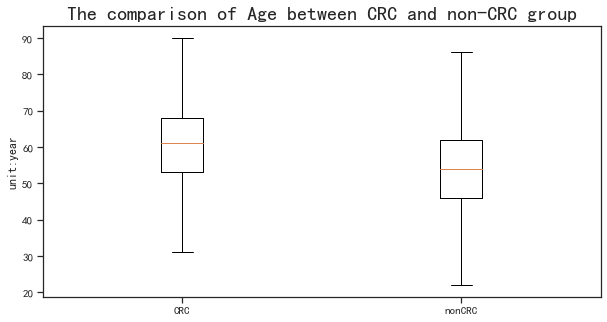

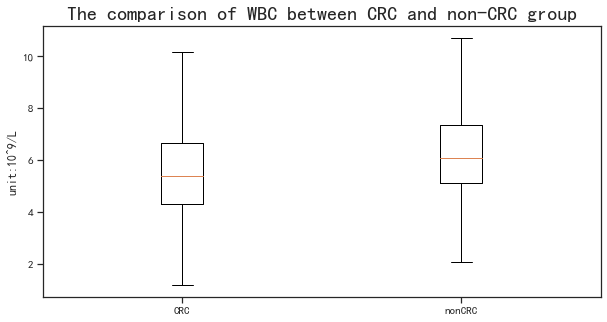

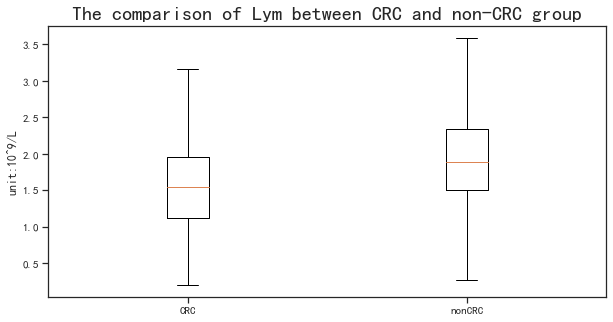

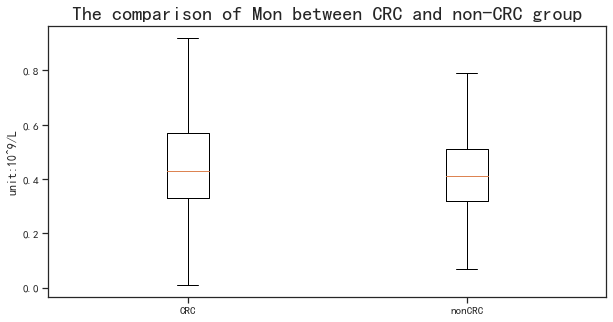

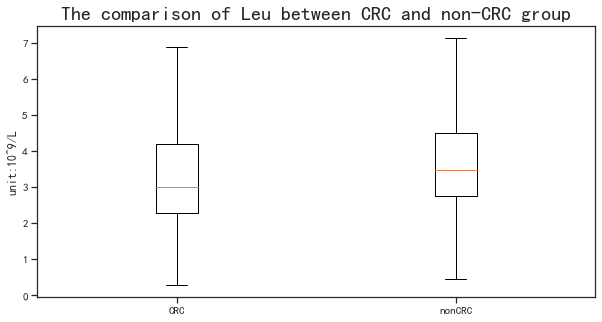

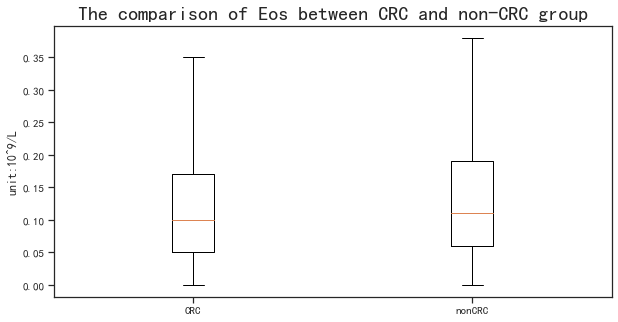

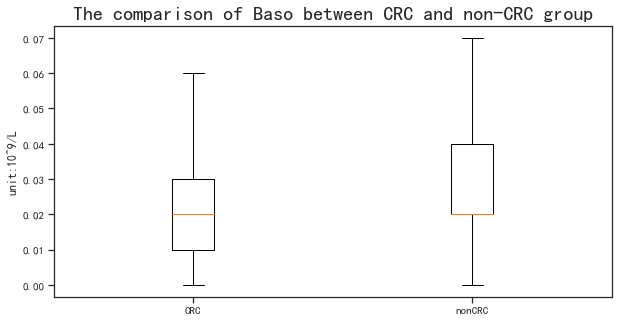

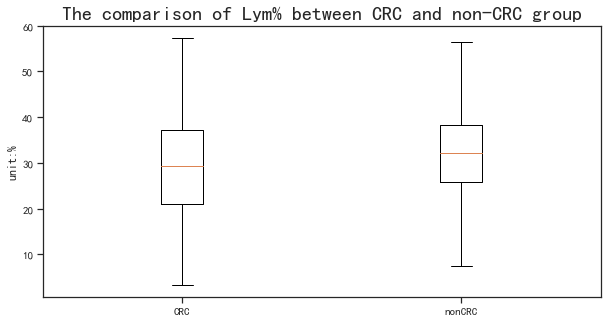

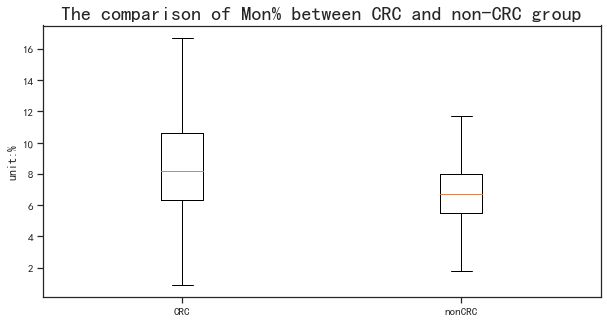

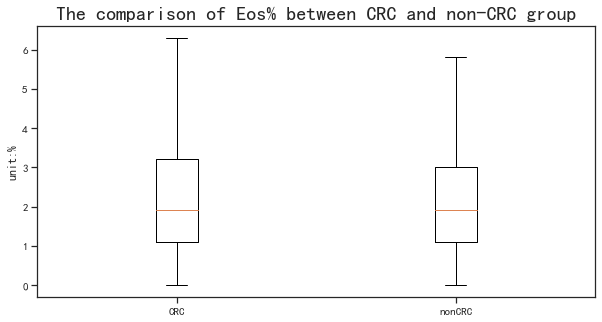

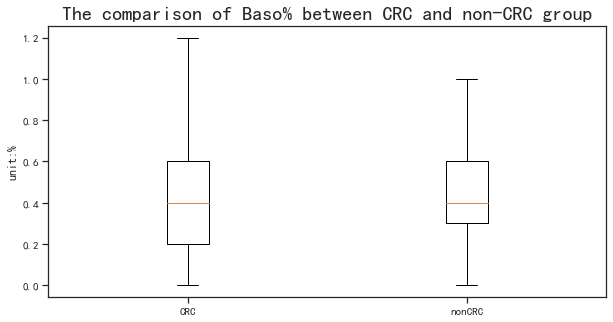

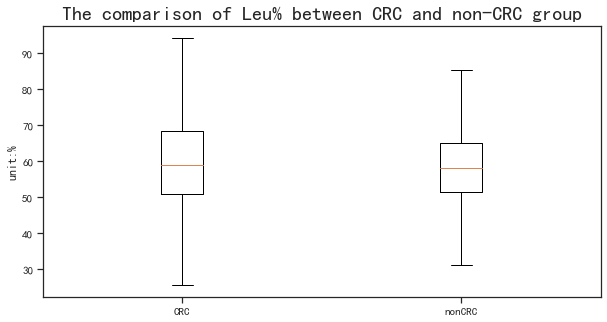

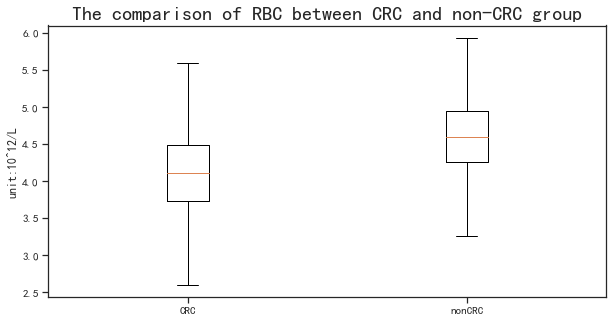

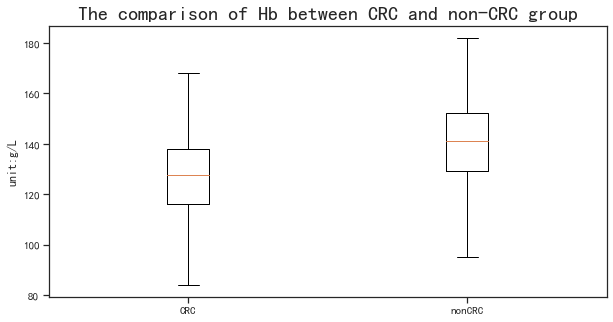

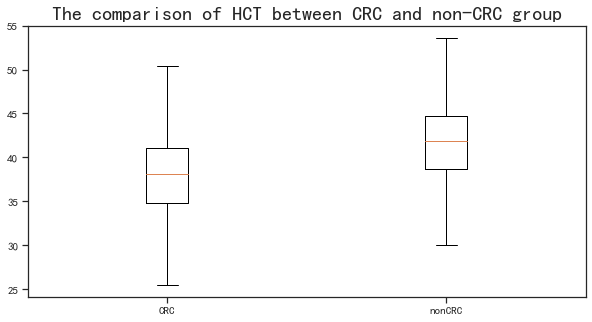

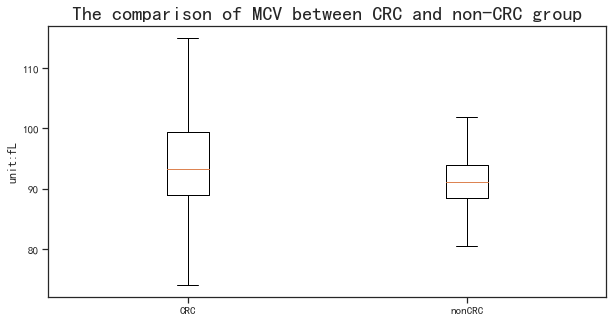

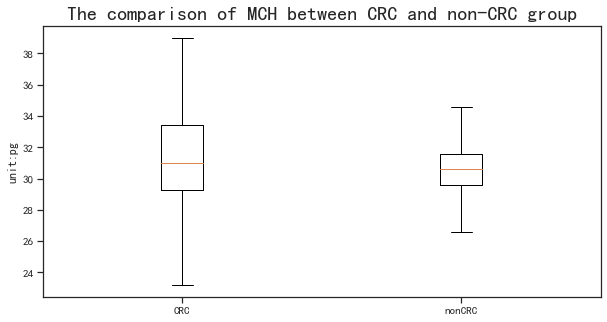

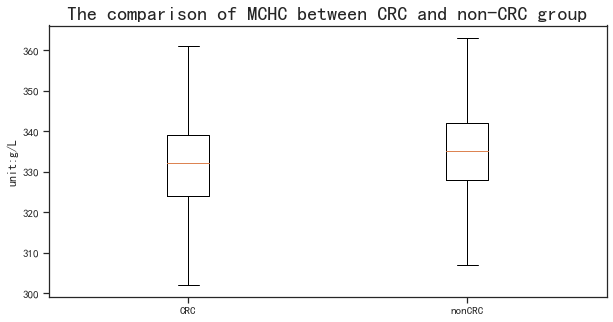

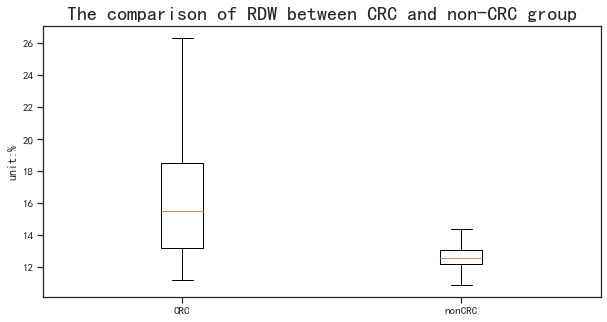

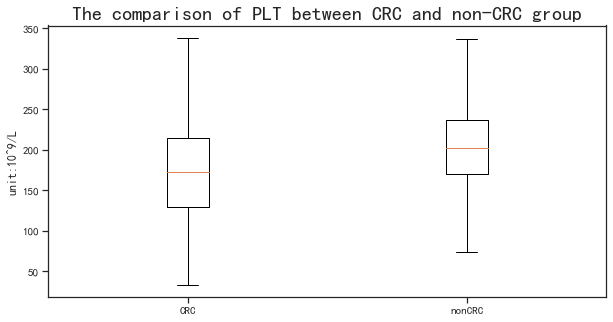

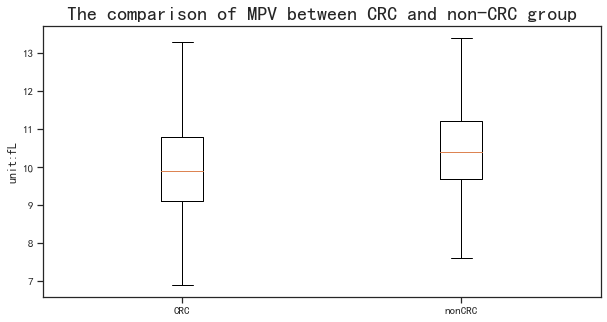

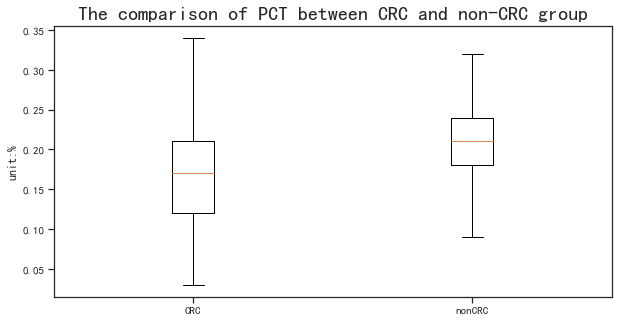

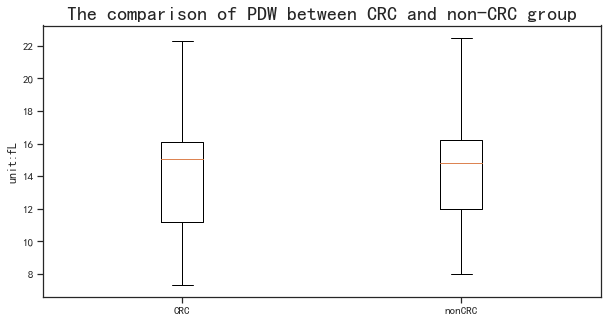

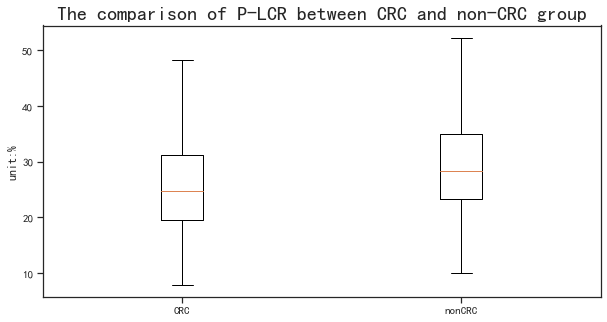

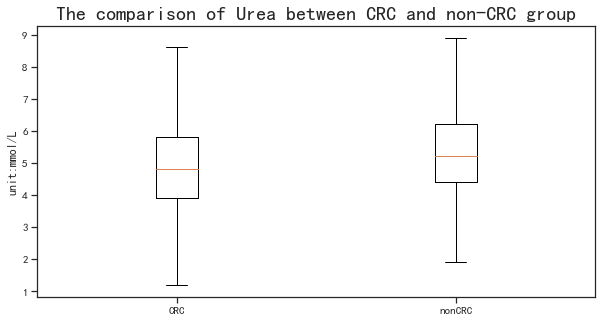

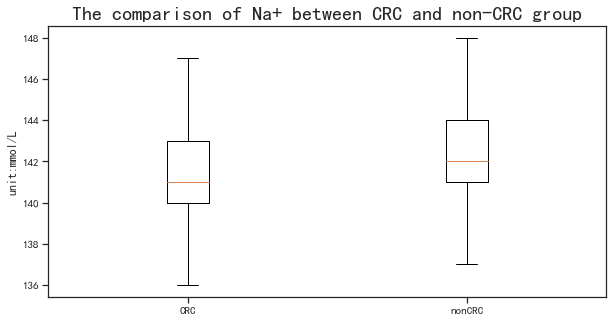

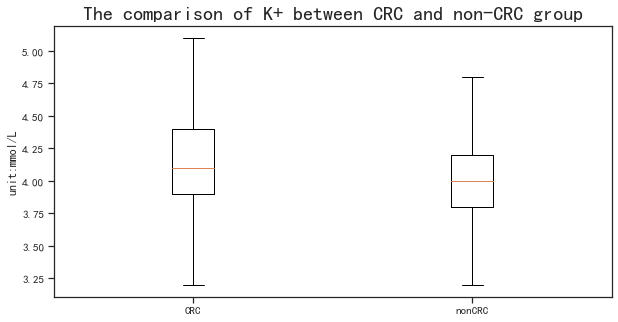

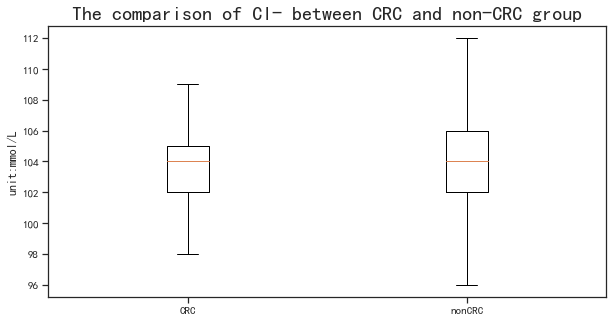

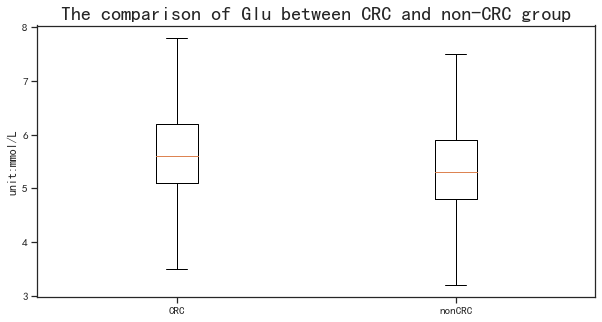

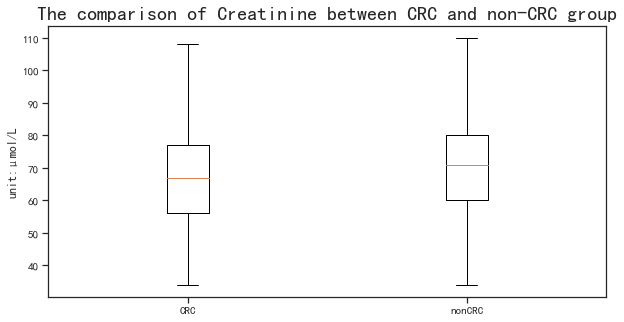

C:\Users\Wu Zihao\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8322 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Wu Zihao\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8322 missing from current font.
  font.set_text(s, 0, flags=flags)


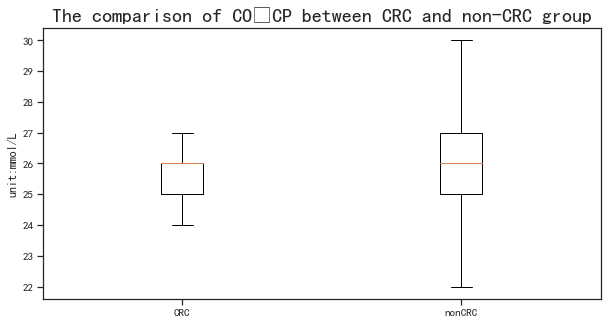

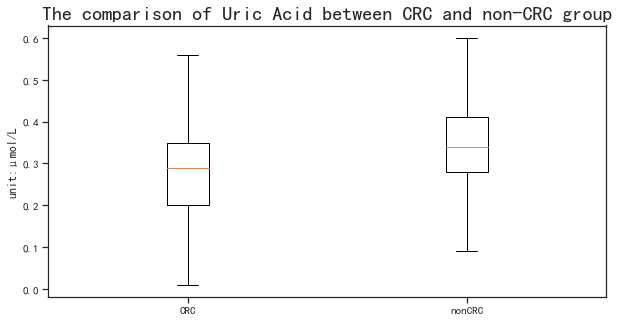

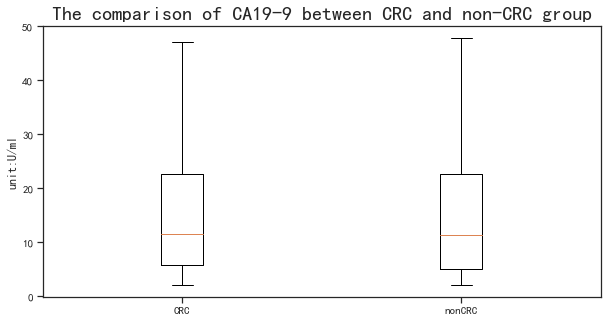

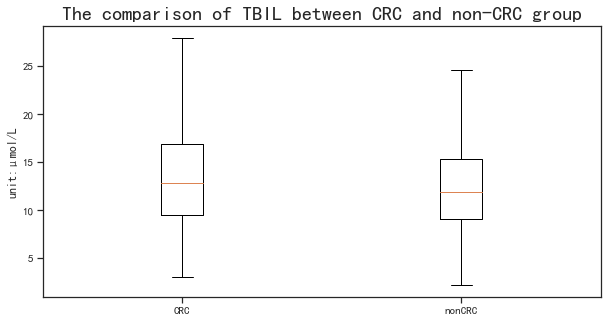

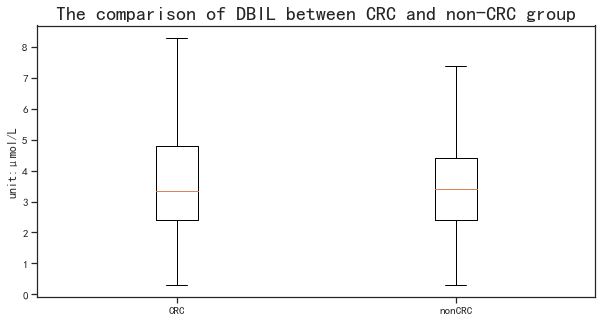

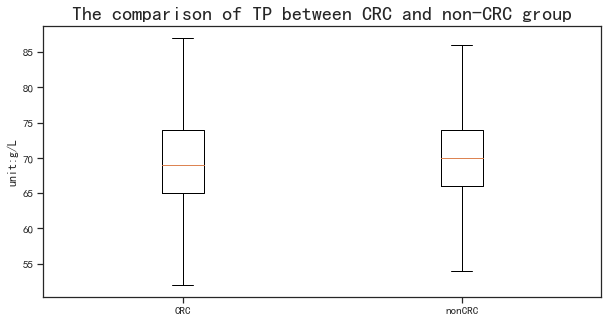

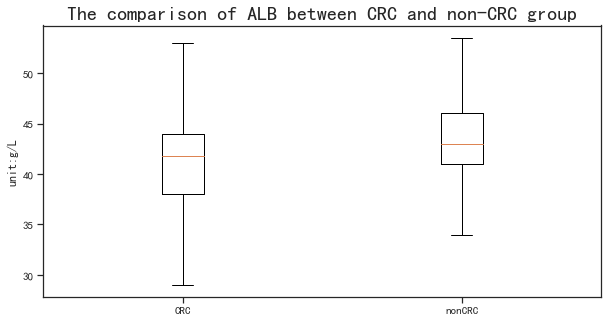

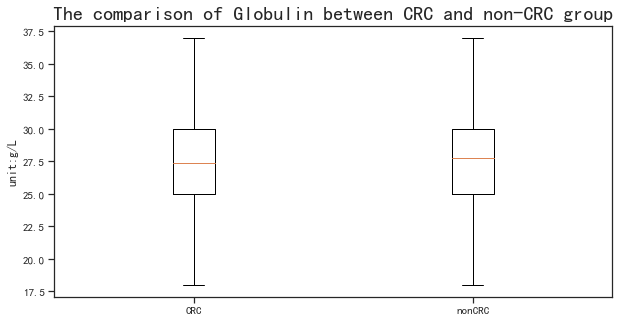

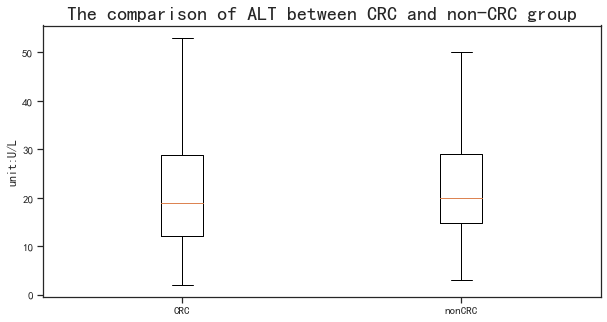

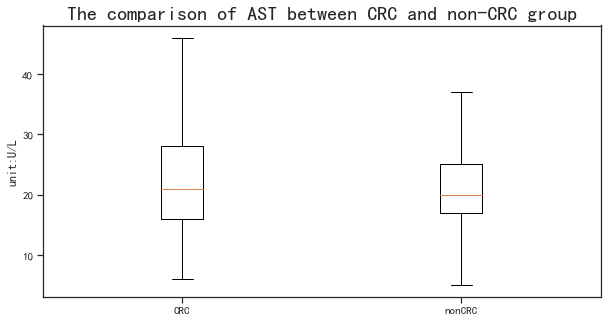

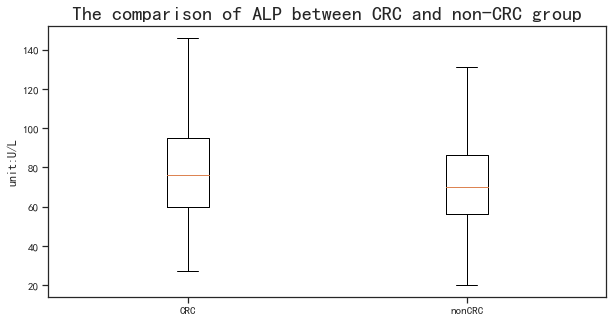

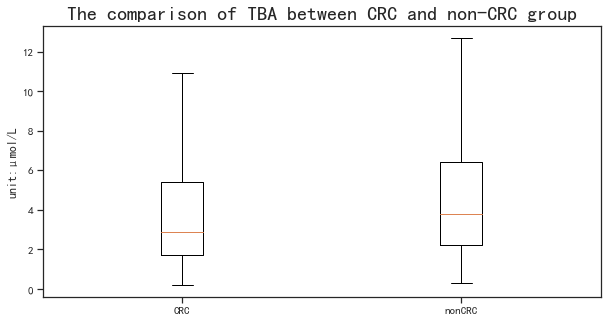

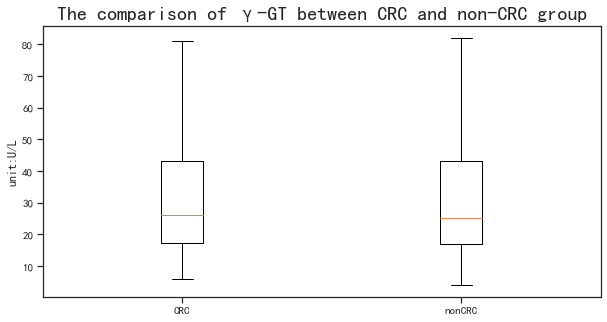

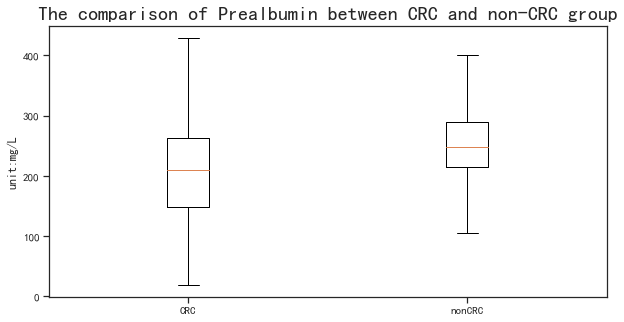

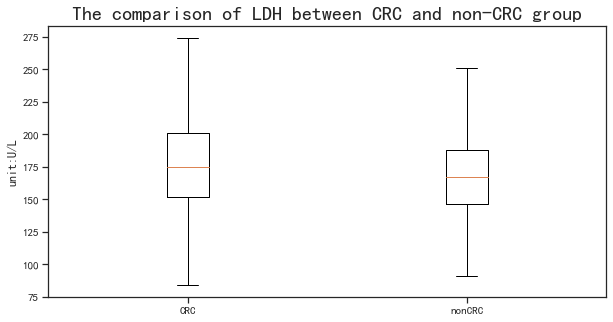

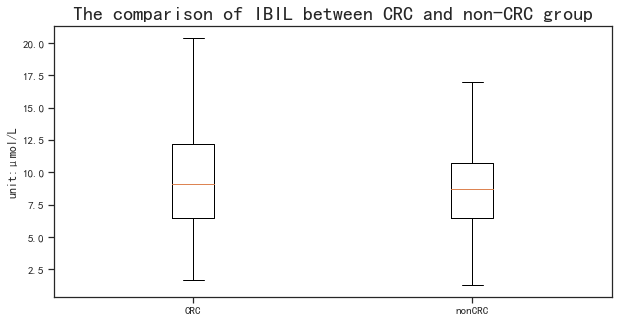

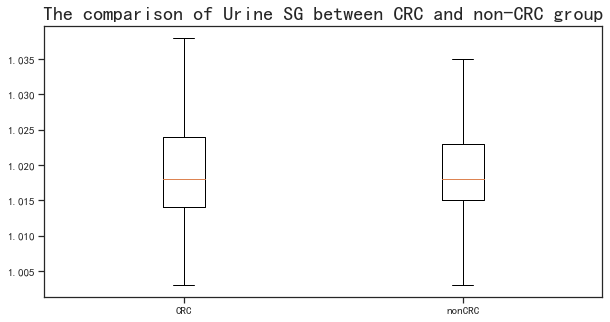

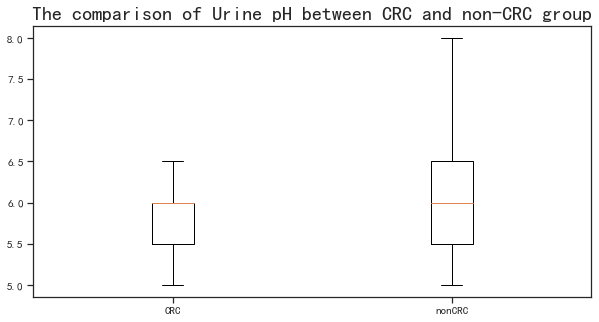

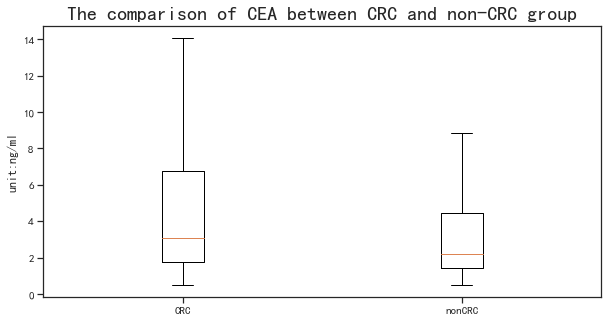

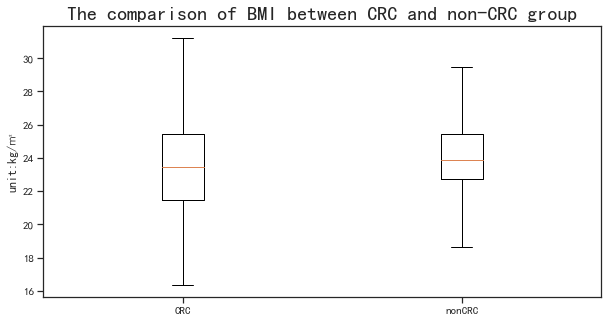

In [94]:
for i in non_binary_list:
    box_1, box_2 = df[df["癌"]==1][i], df[df["癌"]==0][i]
    f, ax= plt.subplots(figsize=(10,5))#设置画布的尺寸
    ax.set_title('The comparison of '+i+" between CRC and non-CRC group",fontsize=20)#标题，并设定字号大小
    labels = ['CRC','nonCRC']#图例
    
    unit_info=unit_data[unit_data["Eng name"].isin([i])]
    unit_info.reset_index(inplace=True)
    y_label = "unit:"+str(unit_info["unit"].loc[0])
    
    
    if unit_info["unit"].loc[0] != "无":
        ax.boxplot([box_1, box_2], labels = ['CRC','nonCRC'], vert=True,showmeans=False,sym="")
        ax.set_ylabel(y_label)
        
    else: 
        ax.boxplot([box_1, box_2], labels = ['CRC','nonCRC'], vert=True,showmeans=False,sym="")
    
    #ax.legend()

    #plt.show()
    try:
        plt.savefig(r"D:\HKUST\Program\结肠癌分类器\终稿\Ver 10.24\box graph\confident\non binary graph" +"/" + i+".png")
    except:
        pass

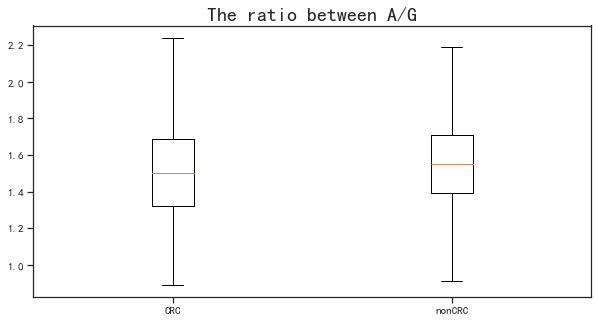

In [95]:
i='A/G\xa0'

box_1, box_2 = df[df["癌"]==1][i], df[df["癌"]==0][i]
i="The ratio between A and G"
plt.figure(figsize=(10,5))#设置画布的尺寸
plt.title('The ratio between A/G',fontsize=20)#标题，并设定字号大小
labels = 'CRC','nonCRC'#图例
plt.boxplot([box_1, box_2], labels = labels, vert=True,showmeans=False,sym="")
#plt.legend()
#plt.show()
plt.savefig(r"D:\HKUST\Program\结肠癌分类器\终稿\Ver 10.24\box graph\confident\non binary graph" +"/" + i+".png")

C:\Users\WUZIHA~1\AppData\Local\Temp/ipykernel_6476/749838090.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(5,5))


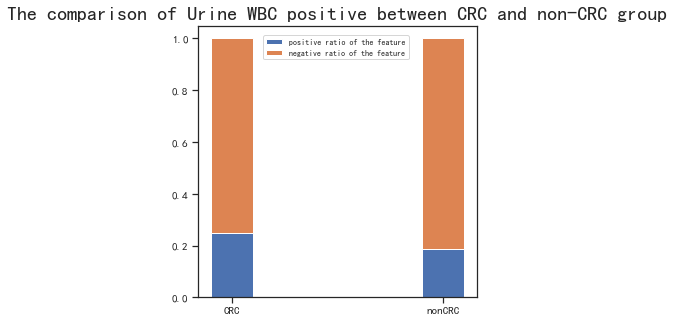

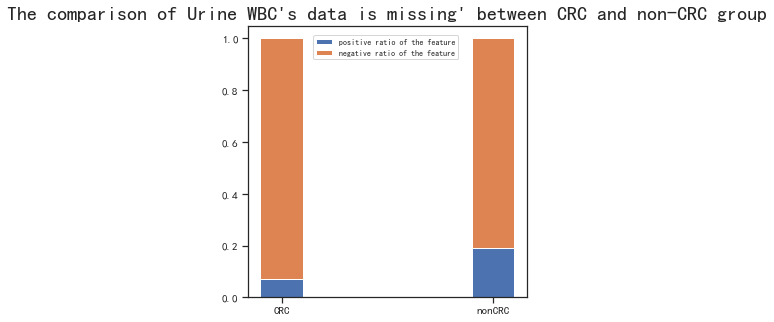

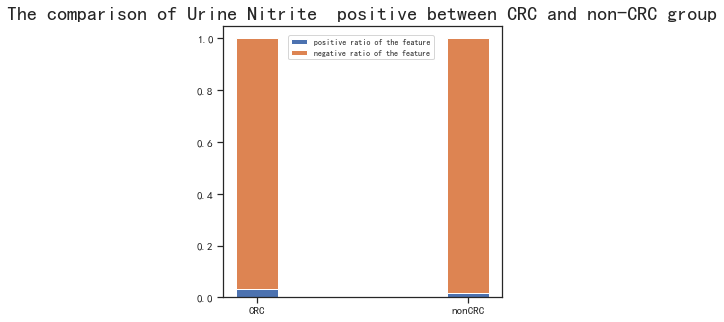

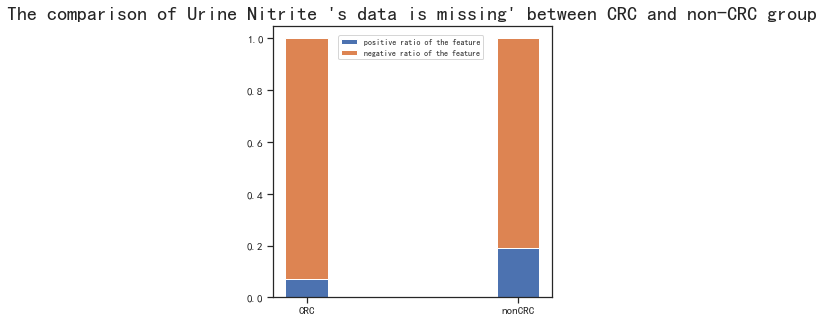

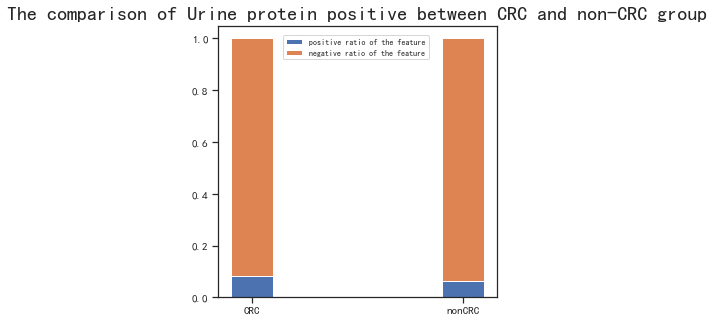

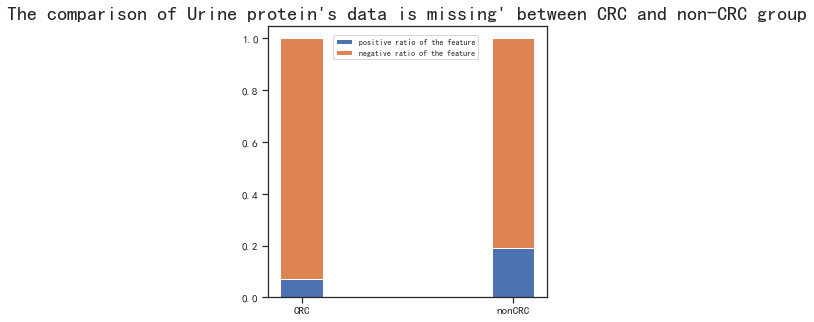

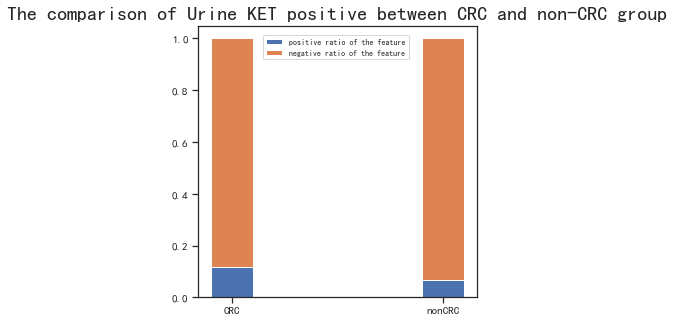

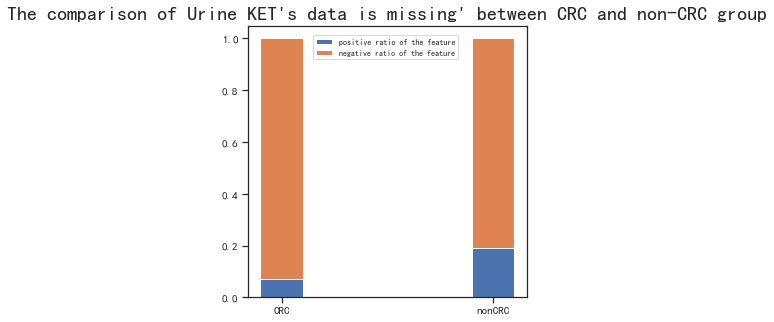

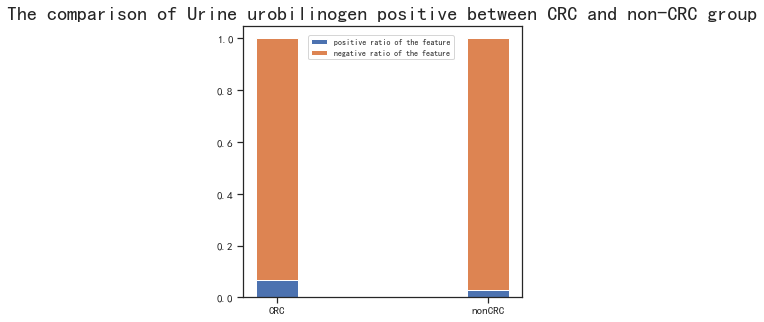

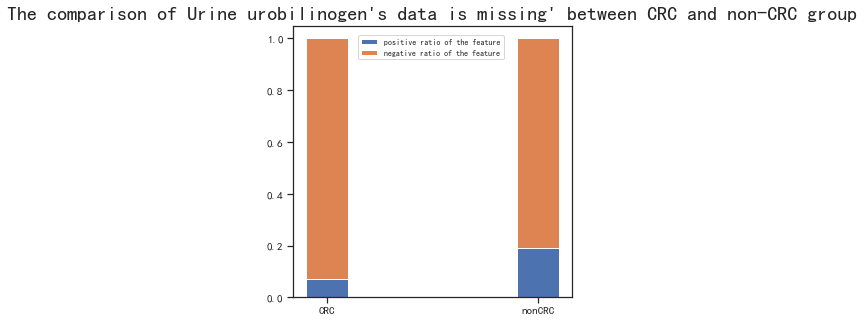

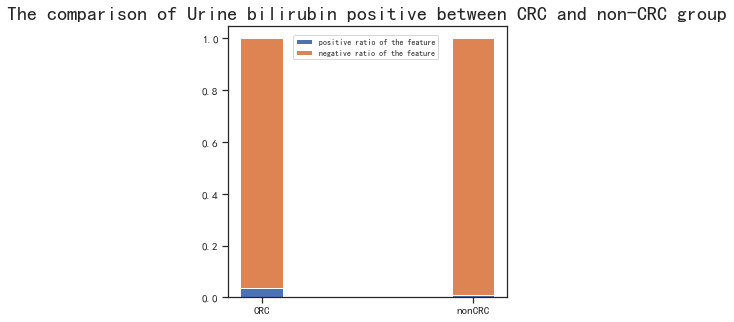

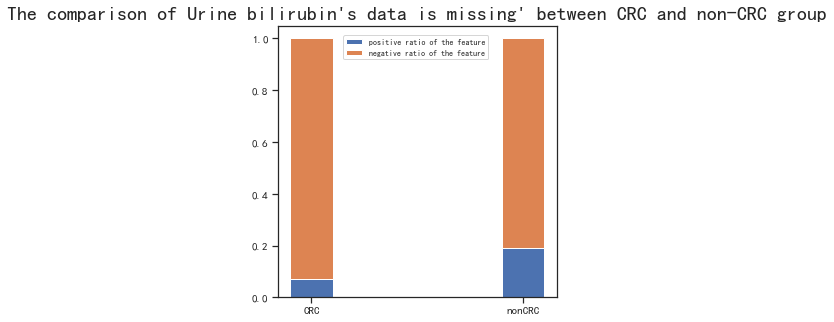

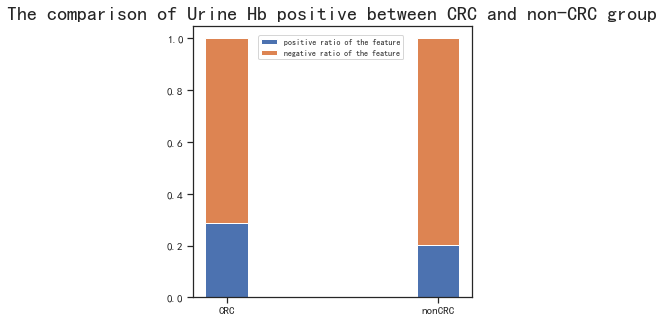

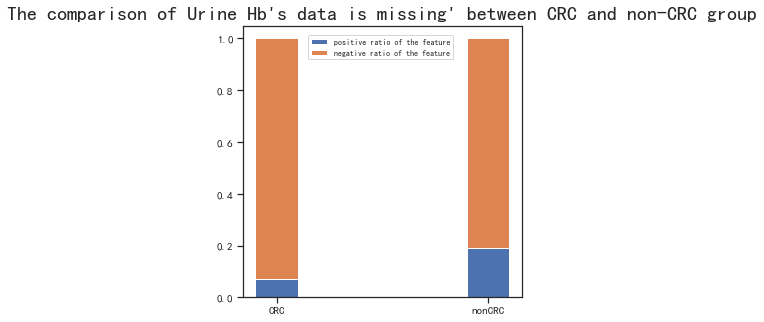

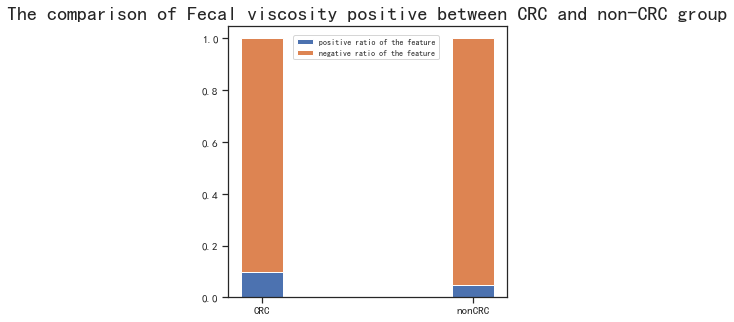

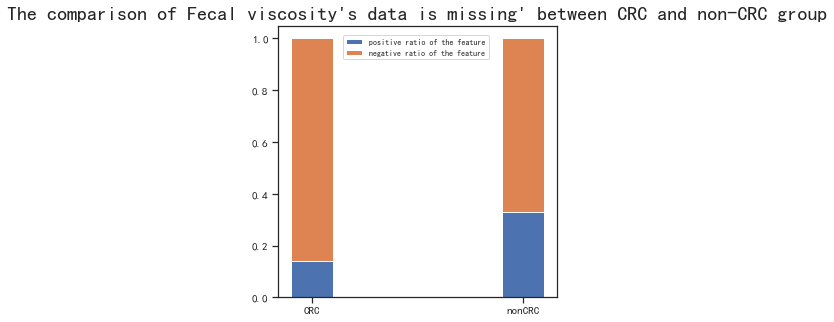

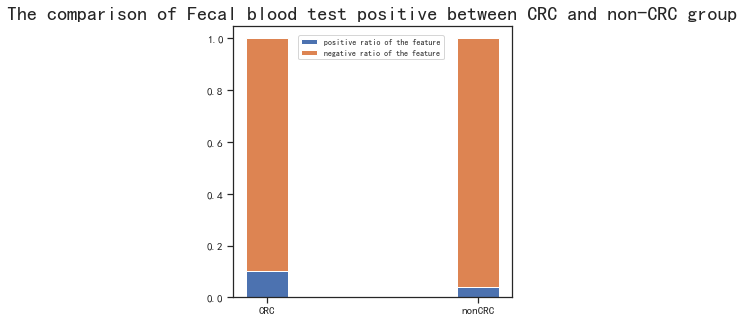

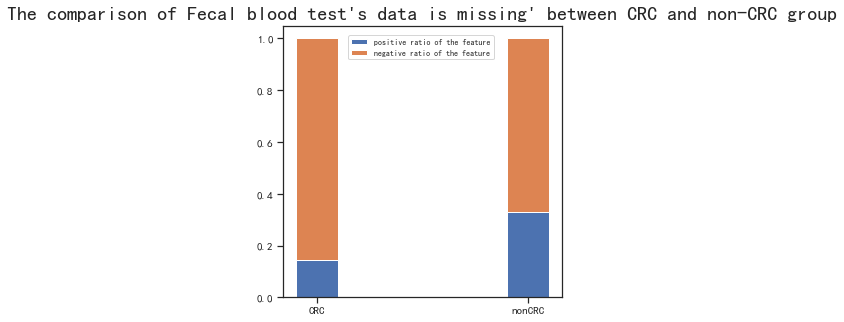

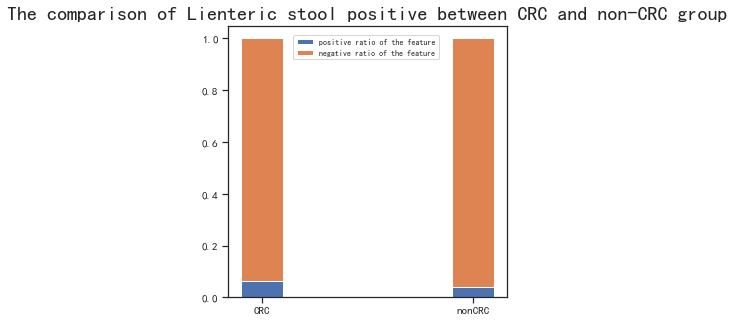

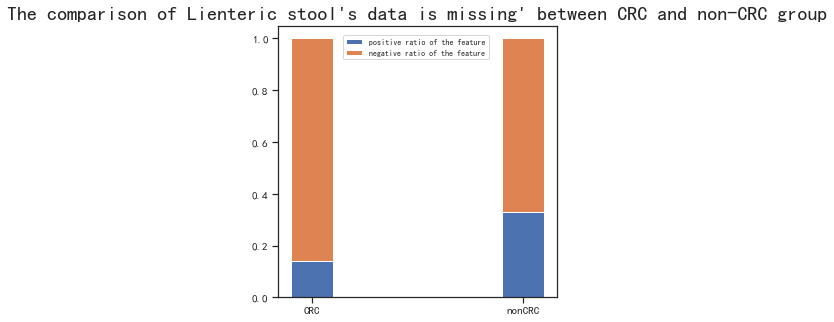

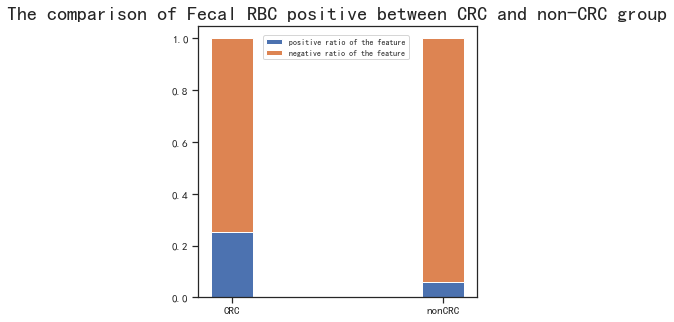

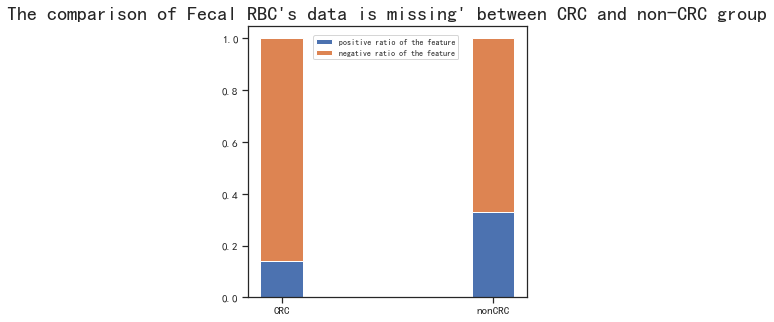

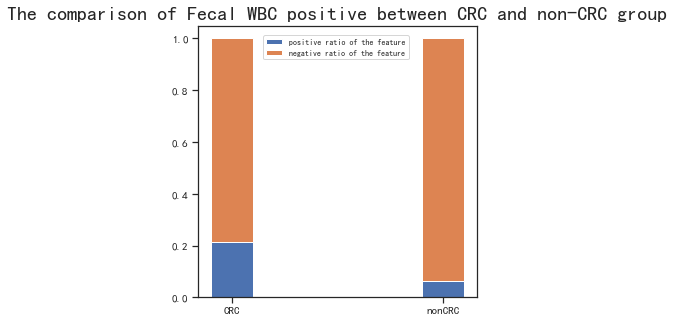

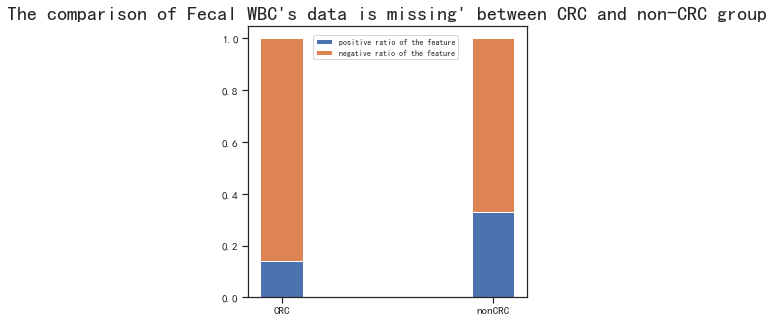

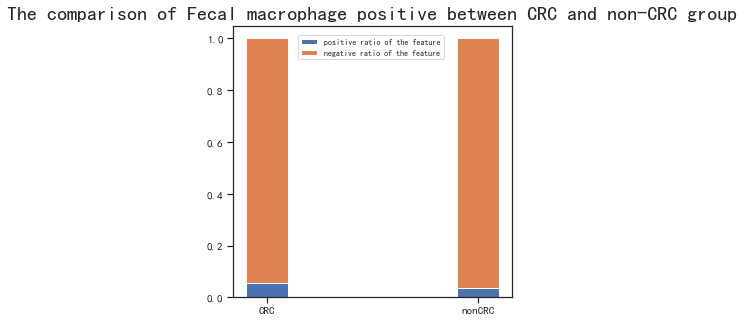

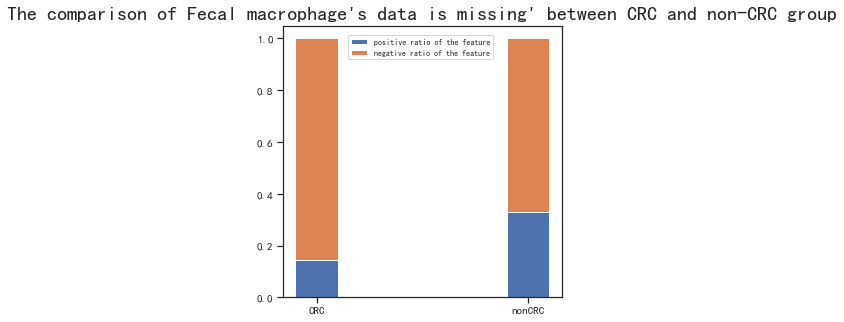

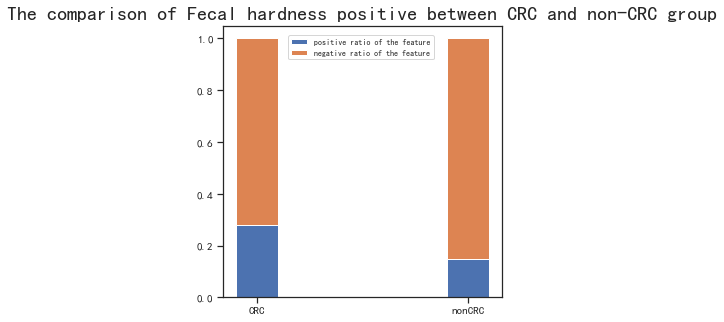

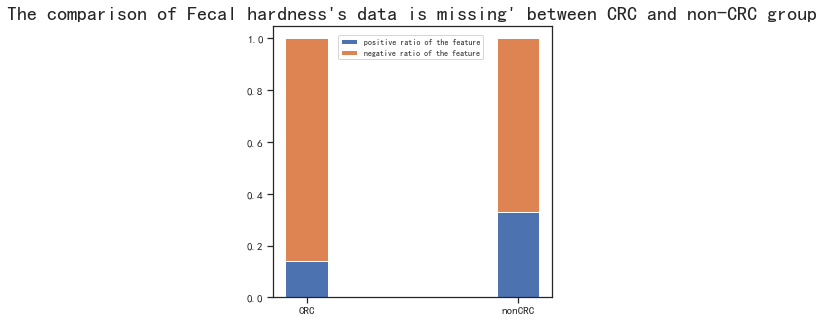

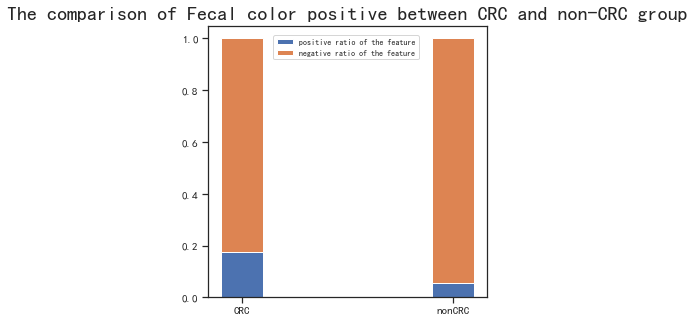

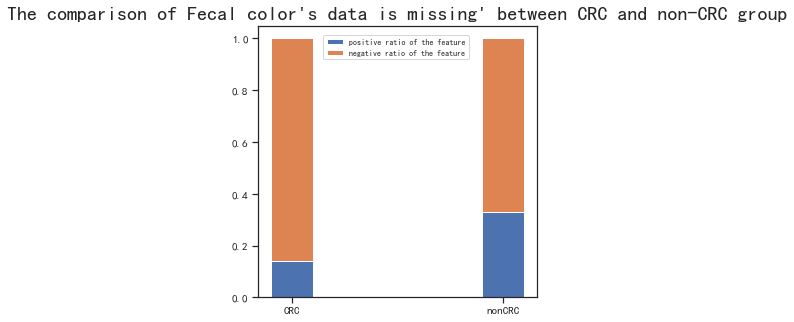

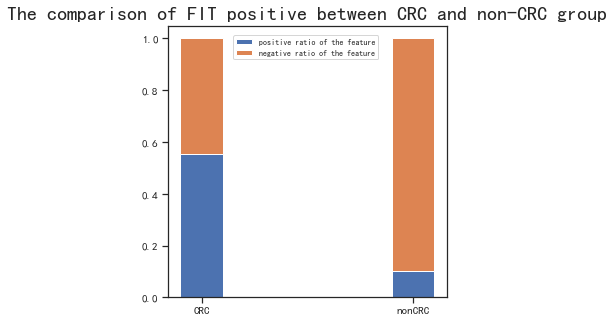

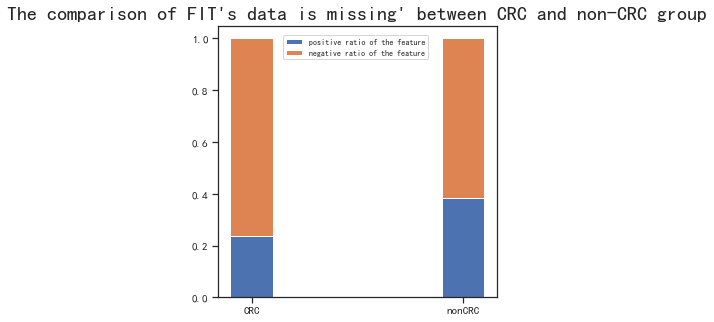

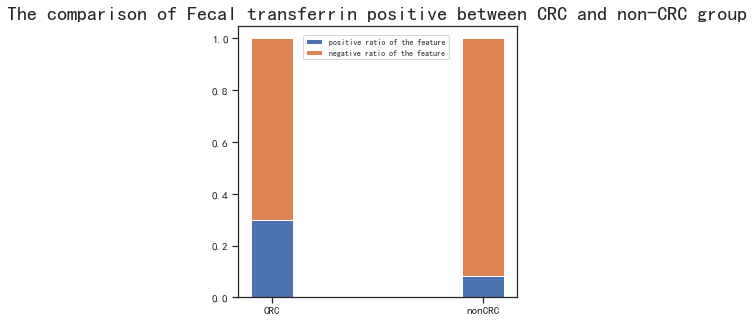

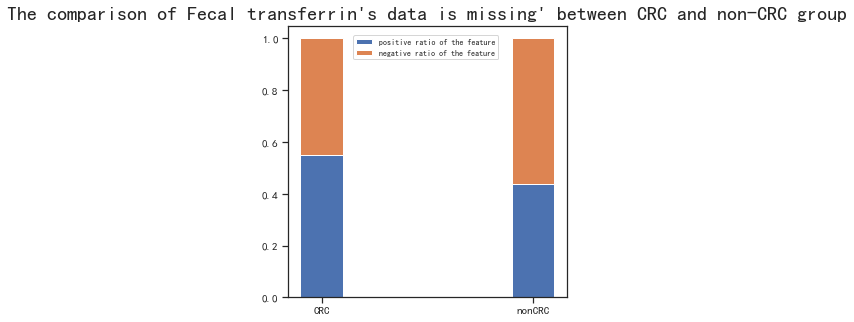

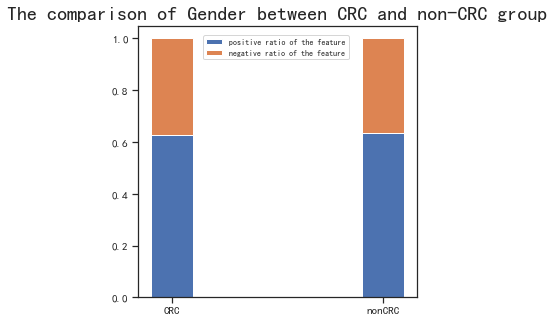

In [190]:
for i in binary_list:
    box_1, box_2 = df[df["癌"]==1][i], df[df["癌"]==0][i]
    ratio_pos_1=box_1.sum()/box_1.count()
    ratio_neg_1=1-box_1.sum()/box_1.count()
    ratio_pos_2=box_2.sum()/box_2.count()
    ratio_neg_2=1-box_2.sum()/box_2.count()

    fig, ax = plt.subplots(figsize=(5,5))
    plt.title('The comparison of '+i+" between CRC and non-CRC group",fontsize=20)#标题，并设定字号大小
    plt.bar(['CRC','nonCRC'],height=[ratio_pos_1,ratio_pos_2],width=0.2,label="positive ratio of the feature")
    plt.bar(['CRC','nonCRC'],bottom=[ratio_pos_1,ratio_pos_2],height=[ratio_neg_1,ratio_neg_2],width=0.2,label="negative ratio of the feature")
    plt.legend(prop={'family':'SimHei','size':8},bbox_to_anchor=(0.22, 0.98))
    #plt.show()
    plt.savefig(r"D:\HKUST\Program\结肠癌分类器\终稿\Ver 10.24\box graph\confident\binary graph" +"/" + i+".png")

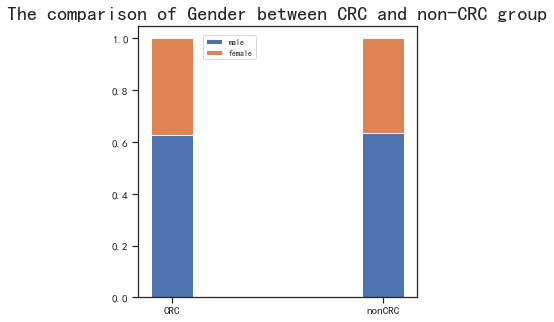

In [192]:
i="Gender"
box_1, box_2 = df[df["癌"]==1][i], df[df["癌"]==0][i]
ratio_pos_1=box_1.sum()/box_1.count()
ratio_neg_1=1-box_1.sum()/box_1.count()
ratio_pos_2=box_2.sum()/box_2.count()
ratio_neg_2=1-box_2.sum()/box_2.count()

fig, ax = plt.subplots(figsize=(5,5))
plt.title('The comparison of '+i+" between CRC and non-CRC group",fontsize=20)#标题，并设定字号大小
plt.bar(['CRC','nonCRC'],height=[ratio_pos_1,ratio_pos_2],width=0.2,label="male")
plt.bar(['CRC','nonCRC'],bottom=[ratio_pos_1,ratio_pos_2],height=[ratio_neg_1,ratio_neg_2],width=0.2,label="female")
plt.legend(prop={'family':'SimHei','size':8},bbox_to_anchor=(0.22, 0.98))
#plt.show()
plt.savefig(r"D:\HKUST\Program\结肠癌分类器\终稿\Ver 10.24\box graph\confident\binary graph" +"/" + i+".png")

In [352]:
raw_data=pd.read_excel(r"D:\HKUST\Program\结肠癌分类器\终稿\std_data.xlsx")
new_label=pd.read_excel(r"D:\HKUST\Program\结肠癌分类器\终稿\new_label.xlsx")

In [353]:
raw_data

,PATIENT_ID,年龄,血_白细胞计数,血_淋巴细胞计数,血_单核细胞计数,血_中性粒细胞计数,血_嗜酸粒细胞计数,血_嗜碱粒细胞计数,血_淋巴细胞,血_单核细胞,...,粪_粪血液,粪_粪不消化食物,粪_粪红细胞,粪_粪白细胞,粪_粪巨噬细胞,粪_粪硬度,粪_粪颜色,血_癌胚抗原,粪_粪隐血,粪_粪转铁蛋白
0,K03237316,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,K00221060,61.0,4.16,1.09,0.52,2.53,0.00,0.02,26.2,12.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,02958460,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.18,NaN,NaN
3,K00797289,73.0,3.63,0.75,0.17,2.67,0.04,0.00,20.7,4.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,J0121640X,69.0,11.28,1.11,0.40,9.76,0.00,0.01,9.9,3.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71345,05652241,51.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71346,K0782725X,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71347,05453274,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71348,P04606802,70.0,6.27,1.38,0.34,4.52,0.02,0.01,22.0,5.4,...,无,无,1-2,无,无,稀,黄色,1.85,+,阳性


In [354]:
new_label

,PID,病理时间,分组,部位分组,最大病变大小,癌症分级
0,04711361,2015-09-01 09:49:27,4,4,1.0,NaN
1,K00290357,2015-10-27 09:51:33,7,1,NaN,NaN
2,04015754,2013-12-04 10:04:39,7,1,NaN,NaN
3,M01273916,2016-08-04 14:43:52,3,4,0.5,NaN
4,05833650,2018-11-27 16:31:43,3,4,0.6,NaN
...,...,...,...,...,...,...
100000,R01309305,2015-06-29 15:51:09,2,4,3.0,NaN
100001,02264819,2015-05-15 00:00:00,3,2,NaN,NaN
100002,P07254785,2018-07-12 09:23:21,4,3,0.4,NaN
100003,H04363275,2018-03-21 08:23:51,3,1,0.6,NaN


In [357]:
CRC=0;
non_CRC=0;
ID_list=[]

for i in tqdm(new_label.index):
    ID_list.append(new_label["PID"].loc[i])


for i in tqdm(raw_data.index):
    if raw_data["PATIENT_ID"].loc[i] in ID_list:
        CA_result=new_label[new_label["PID"].isin([raw_data["PATIENT_ID"].loc[i]])]
        CA_result=CA_result.reset_index()
        if CA_result["分组"].loc[0] in [1]:
            CRC+=1
        else:
            non_CRC+=1

  0%|          | 0/100005 [00:00<?, ?it/s]

  0%|          | 0/71350 [00:00<?, ?it/s]

In [358]:
CRC,non_CRC

(10316, 51434)

In [368]:

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
#将数据集划分成训练集和测试集（比例为7：3）
y = np.array(df['癌'])
X = df.drop(['PATIENT_ID', '癌'], axis=1)
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state= 42)

lr = LinearRegression()
#训练模型
x=lr.fit(X_train, y_train)
#进行预测
y_pred = lr.predict(X_test)
#y_pred


In [370]:
x.coef_

array([ 2.25121733e-03,  4.68817461e-04, -1.93936512e-02, -8.63143051e-03,
       -4.80414520e-03, -2.11331181e-02,  5.76792244e-01,  3.41546084e-03,
        1.34944665e-02,  1.50281641e-02, -8.08423659e-02,  4.71997181e-03,
       -1.50942445e-02, -1.06191842e-03, -8.17472364e-04,  1.23460992e-02,
       -2.28209504e-02,  2.74968112e-03,  4.09090695e-02, -2.67604586e-04,
        4.26234032e-02, -1.06725110e-03,  1.75802230e-03, -8.92761812e-03,
       -1.00685521e-02, -6.29106629e-03,  7.73311398e-02, -5.59485988e-03,
        2.48743973e-03, -2.27429314e-04,  1.93971993e-03, -7.80576694e-06,
        2.20847804e-04, -2.08239229e-04, -7.03205230e-04,  5.23533482e-03,
       -3.70164772e-03, -9.65912536e-03, -2.23146878e-02,  3.85334041e-04,
        1.95219133e-05,  1.21855474e-04, -2.16247430e-03,  2.18008872e-05,
       -7.50944246e-04, -3.18643628e-05,  2.21290700e-03,  1.09781931e+00,
       -3.54619801e-02,  2.39360901e-02,  1.05771192e-01,  3.12687815e-02,
       -3.23156677e-02,  

In [12]:
mc=pd.read_excel(r"D:\HKUST\Program\结肠癌分类器\终稿\去粪指标修改\Table7.xlsx")
mc

,Unnamed: 0,accuracy,AUC,F1-score,sensitvity,specificity,PPV,NPV,odds ratio
0,confident full,0.956801,0.940605,0.956625,0.909683,0.971526,0.926217,0.969038,432.269366
1,NaN,0.006850,0.015133,0.006917,0.038474,0.014387,0.017627,0.007631,119.676338
2,confident simplified,0.953974,0.918125,0.953240,0.856325,0.979925,0.928954,0.961305,368.470704
3,NaN,0.005509,0.019262,0.005659,0.045270,0.008406,0.018094,0.007789,137.783102


In [13]:
mc.columns[1:]

Index(['accuracy', 'AUC', 'F1-score', 'sensitvity', 'specificity', 'PPV',
       'NPV', 'odds ratio'],
      dtype='object')

In [15]:
a=[];
for i  in  range(2):
    b=[];
    for j in mc.columns[1:]:
        b.append(str("%.3f" %mc[j].loc[2*i])+"±"+str("%.3f" %mc[j].loc[2*i+1]))
    a.append(b)
a

[['0.957±0.007',
  '0.941±0.015',
  '0.957±0.007',
  '0.910±0.038',
  '0.972±0.014',
  '0.926±0.018',
  '0.969±0.008',
  '432.269±119.676'],
 ['0.954±0.006',
  '0.918±0.019',
  '0.953±0.006',
  '0.856±0.045',
  '0.980±0.008',
  '0.929±0.018',
  '0.961±0.008',
  '368.471±137.783']]

In [16]:
pd.DataFrame(a).to_excel(r"D:\HKUST\Program\结肠癌分类器\终稿\去粪指标修改\Table 7.xlsx")

### Summarize Data missing situation respect to group

In [62]:
chosen_data=pd.read_excel(r"D:\HKUST\Program\结肠癌分类器\终稿\chosen_data_stage2_rev.xlsx")
chosen_data

,年龄,血_白细胞计数,血_淋巴细胞计数,血_单核细胞计数,血_中性粒细胞计数,血_嗜酸粒细胞计数,血_嗜碱粒细胞计数,血_淋巴细胞,血_单核细胞,血_嗜酸粒细胞,血_嗜碱粒细胞,血_中性粒细胞,血_红细胞计数,血_血红蛋白,血_红细胞比积,血_平均红细胞体积,血_平均红细胞血红蛋白含量,血_平均红细胞血红蛋白浓度,血_红细胞分布宽度,血_血小板计数,血_平均血小板体积,血_血小板压积,血_血小板分布宽度,血_大血小板细胞比率,血_尿素,血_钠,血_钾,血_氯,血_葡萄糖,血_肌酐,血_二氧化碳结合力,血_尿酸,血_糖类抗原CA199,血_总胆红素,血_直接胆红素,血_总蛋白,血_白蛋白,血_球蛋白,血_白蛋白/球蛋白,血_丙氨酸氨基转移酶,血_门冬氨酸氨基转移酶,血_碱性磷酸酶,血_总胆汁酸,血_γ-谷氨酰转肽酶,血_前白蛋白,血_乳酸脱氢酶,血_间接胆红素,尿_比重,尿_酸碱度,尿_白细胞,尿_亚硝酸盐,尿_蛋白质,尿_葡萄糖,尿_酮体,尿_尿胆原,尿_胆红素,尿_红细胞血红蛋白,粪_粪粘度,粪_粪血液,粪_粪不消化食物,粪_粪红细胞,粪_粪白细胞,粪_粪巨噬细胞,粪_粪硬度,粪_粪颜色,血_癌胚抗原,粪_粪隐血,粪_粪转铁蛋白,性别,体重,身高,癌,癌前病变,良性疾病,健康或非结肠疾病
0,61,4.16,1.09,0.52,2.53,0.00,0.02,26.2,12.5,0.0,0.5,60.8,5.08,173,48.40,95.3,34.1,357.0,13.6,99,9.50,0.09,10.70,21.9,4.1,141,4.5,101,5.6,86,27,0.36,NaN,5.3,2.4,69,39,30.0,1.30,44,41,80,5.1,51,147,249,2.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,72.0,180.0,0,0,1,0
1,73,3.63,0.75,0.17,2.67,0.04,0.00,20.7,4.7,1.1,0.0,73.5,4.81,149,43.50,90.4,31.0,343.0,12.9,101,10.4,0.11,12.40,28.0,4.0,142,4.0,106,4.0,56,26,0.26,NaN,19.4,6.9,72,47,25.0,1.88,16,22,68,6.5,38,192,152,12.5,1.005,8.0,阴性,阴性,阴性,正常,阴性,正常,阴性,阴性,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,80.0,176.0,0,0,1,0
2,84,3.65,1.33,0.22,1.98,0.10,0.02,36.4,6.0,2.7,0.5,54.4,3.68,122,35.20,95.7,33.2,347.0,12.8,167,9.20,0.15,9.50,17.6,3.9,136,4.2,97,6.3,80,25,0.21,27.91,5.3,1.6,70,43,27.0,1.59,6,17,109,2.2,26,210,126,3.7,1.008,6.0,阴性,阴性,阴性,正常,阴性,正常,阴性,阴性,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.69,NaN,NaN,0.0,50.0,160.0,0,1,0,0
3,71,7.29,1.79,0.30,5.08,0.12,0.00,24.6,4.1,1.6,0.0,69.7,3.84,125,37.20,96.9,32.6,336.0,12.4,187,9.6,0.18,10.40,21.6,8.3,146,4.1,105,5.6,85,26,0.27,NaN,7.3,2.2,74,45,29.0,1.55,14,16,38,10.1,11,NaN,146,5.1,1.010,6.0,阴性,阴性,阴性,正常,阴性,正常,阴性,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1
4,80,5.68,1.81,0.37,3.36,0.12,0.02,31.9,6.5,2.1,0.4,59.1,3.06,99,27.90,91.2,32.4,355.0,11.6,175,9.20,0.16,9.10,17.7,4.9,132,3.8,100,9.7,66,26,0.38,< 2.00,7.7,2.3,63,37,26.0,1.42,11,18,66,2.3,18,199,143,5.4,1.010,5.0,100.0,阳性,0.25,正常,阴性,正常,阴性,10.0,-,-,-,-,-,-,软,黄色,3.63,NaN,NaN,0.0,72.0,155.0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27906,56,4.58,1.45,0.38,2.49,0.23,0.03,31.7,8.3,5.0,0.7,54.3,4.41,147,43.10,97.7,33.3,341.0,12.5,219,10.00,0.22,11.00,23.8,5.0,142,4.1,105,5.4,69,NaN,0.31,NaN,12.6,2.2,71,48,23.0,2.09,32,20,80,3.4,42,NaN,182,10.4,1.013,7.5,阴性,阴性,阴性,正常,阴性,正常,阴性,阴性,-,-,-,-,-,-,软,黄色,NaN,阴性,阴性,1.0,59.0,165.0,0,0,1,0
27907,39,4.21,1.28,0.34,2.49,0.08,0.02,30.4,8.1,1.9,0.5,59.1,4.85,156,45.10,93.0,32.2,346.0,11.6,178,10.30,0.18,11.20,27.5,5.8,137,4.2,100,6.0,90,26,0.44,< 2.00,31.8,4.0,74,51,23.0,2.22,20,20,75,1.0,38,325,160,27.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.68,NaN,NaN,NaN,NaN,NaN,0,0,0,1
27908,56,5.88,2.60,0.52,2.58,0.14,0.04,44.2,8.8,2.4,0.7,43.9,4.12,129,40.00,97.1,31.3,323.0,13.5,251,10.50,0.26,11.90,28.8,4.7,144,3.9,108,5.3,61,25,0.25,NaN,17.9,2.9,70,44,26.0,1.69,26,18,88,1.2,19,245,151,15.0,1.022,6.0,阴性,阴性,阴性,正常,阴性,正常,阴性,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1
27909,77,10.04,1.92,0.63,7.39,0.07,0.03,19.1,6.3,0.7,0.3,73.6,3.86,112,0.34,87.3,29.0,332.0,15.5,193,10.90,0.21,12.40,30.8,6.5,145,3.5,102,6.6,81,26,434,17.49,7.4,2.8,62,34,28.0,1.21,11,15,155,3.4,21,206,236,4.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.86,NaN,NaN,NaN,NaN,NaN,1,0,0,0


In [167]:
s=1.34
type(s)==np.float

C:\Users\WUZIHA~1\AppData\Local\Temp/ipykernel_8860/2592267681.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  type(s)==np.float


True

In [168]:
for i in tqdm(chosen_data.columns):
    if i in problem:
        for j in tqdm(chosen_data.index):
            if chosen_data[i].loc[j] in ["正常","阴性","NEG","-"," -","软","黄色"]:
                chosen_data[i].loc[j] = 0
            elif chosen_data[i].loc[j] in [""]:
                chosen_data[i].loc[j]= np.nan
            elif type(chosen_data[i].loc[j])==np.float and math.isnan(chosen_data[i].loc[j]): 
                chosen_data[i].loc[j]== np.nan
            else: 
                chosen_data[i].loc[j]= 1

  0%|          | 0/75 [00:00<?, ?it/s]

  0%|          | 0/27911 [00:00<?, ?it/s]

C:\Users\WUZIHA~1\AppData\Local\Temp/ipykernel_8860/886583302.py:8: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif type(chosen_data[i].loc[j])==np.float and math.isnan(chosen_data[i].loc[j]):
C:\Users\Wu Zihao\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


  0%|          | 0/27911 [00:00<?, ?it/s]

  0%|          | 0/27911 [00:00<?, ?it/s]

  0%|          | 0/27911 [00:00<?, ?it/s]

  0%|          | 0/27911 [00:00<?, ?it/s]

  0%|          | 0/27911 [00:00<?, ?it/s]

  0%|          | 0/27911 [00:00<?, ?it/s]

  0%|          | 0/27911 [00:00<?, ?it/s]

  0%|          | 0/27911 [00:00<?, ?it/s]

  0%|          | 0/27911 [00:00<?, ?it/s]

In [170]:
chosen_data["粪_粪隐血"].count()

18808

In [171]:
for i in tqdm(chosen_data.index):
    for j in chosen_data.columns:#####要改
        try:
            chosen_data[j].loc[i]=float(chosen_data[j].loc[i]);
        except:
            chosen_data[j].loc[i]=np.nan;

  0%|          | 0/27911 [00:00<?, ?it/s]

In [30]:
chosen_data

NameError: name 'chosen_data' is not defined

In [173]:
summary_df = pd.DataFrame(columns=["non-missing number in CRC group","missing number in CRC group","total CRC patient","mean in CRC group",
                                  "non-missing number in non-CRC group","missing number in non-CRC group","total non-CRC patient","mean in non-CRC group"])

translation=pd.read_excel(r"D:\HKUST\Program\结肠癌分类器\终稿\Ver 10.24\feature_name 英文.xlsx")

CRC=chosen_data["癌"][chosen_data["癌"]==1].count()
nonCRC=chosen_data["癌"][chosen_data["癌"]==0].count()

for i in chosen_data.columns[:-4]:
    summary_df.loc[i]=""
    
    summary_df["non-missing number in CRC group"].loc[i] = chosen_data[i][chosen_data["癌"]==1].count()
    summary_df["missing number in CRC group"].loc[i] = CRC-chosen_data[i][chosen_data["癌"]==1].count()
    summary_df["total CRC patient"].loc[i] = CRC
    summary_df["mean in CRC group"].loc[i] = chosen_data[i][chosen_data["癌"]==1].mean()
    
    summary_df["non-missing number in non-CRC group"].loc[i] = chosen_data[i][chosen_data["癌"]==0].count()
    summary_df["missing number in non-CRC group"].loc[i] = nonCRC-chosen_data[i][chosen_data["癌"]==0].count()
    summary_df["total non-CRC patient"].loc[i] = nonCRC
    summary_df["mean in non-CRC group"].loc[i] = chosen_data[i][chosen_data["癌"]==0].mean()
    

for i in translation.index:
    chn=translation["chinese"].loc[i]
    eng=translation["English"].loc[i]
    summary_df.rename(index={chn: eng}, inplace=True)
    
summary_df

,non-missing number in CRC group,missing number in CRC group,total CRC patient,mean in CRC group,non-missing number in non-CRC group,missing number in non-CRC group,total non-CRC patient,mean in non-CRC group
Age,10167,0,10167,60.388709,17744,0,17744,55.263807
WBC,10035,132,10167,6.15687,17636,108,17744,6.545184
Lym,10160,7,10167,1.528474,17732,12,17744,1.876426
Mon,10160,7,10167,0.466094,17732,12,17744,0.439637
Leu,10160,7,10167,3.967867,17732,12,17744,4.032759
Eos,10160,7,10167,0.145547,17732,12,17744,0.146557
Baso,10160,7,10167,0.022927,17732,12,17744,0.02698
Lym%,10162,5,10167,26.937867,17735,9,17744,30.231074
Mon%,10162,5,10167,8.027563,17735,9,17744,6.908841
Eos%,10162,5,10167,2.51604,17734,10,17744,2.330224


In [174]:
summary_dfato_excelto_excel(r"D:\HKUST\Program\结肠癌分类器\终稿\整理V3\table6(replace Fig2).xlsx")

In [151]:
problem=list(summary_df[summary_df["non-missing number in CRC group"]==0].index)
problem.append("粪_粪硬度")

In [137]:
pd.set_option('display.max_rows', 90)

In [63]:
chosen_data["癌"][chosen_data["癌"]==0].count()

17744